# <u>Problem Statement</u>

### You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

### 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
### 2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## <u>Objective</u>
#### Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## <u>Constraints</u>
### When a person applies for a loan, there are two types of decisions that could be taken by the company:

####    <u>Loan accepted:</u> If the company approves the loan, there are 3 possible scenarios described below:

####    <u>Fully paid:</u> Applicant has fully paid the loan (the principal and the interest rate)

####    <u>Current:</u> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    
####    <u>Charged-off:</u> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

####    <u>Loan rejected:</u> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## 1. Reading the Input Data from File

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Ignore warnings due to version issues
import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Read the loan.csv file and convert it into a DataFrame
loan = pd.read_csv('loan.csv',low_memory = False)
#viewing the dataframe
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

##  2. <u>Data Cleaning.</u>

### 2.1 Understanding the Structure of the data

In [3]:
#Checking the shape
loan.shape
# we can see that the no. of rows is 39717, and columns is 111

(39717, 111)

In [4]:
list(loan.columns.values)
## Looking through the list of column names in the DF

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [5]:
# Basic Info of the Data Frame
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# Getting basic statistical details of the data frame
loan.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00            0.00   
25%         167.02    40404.00     8.17         0.00            0.00   
50%         280.22    59000.00    13.40         0.00            1.00   
75%         430.78    82300.00    18.60         0.00            1.00   
max        1305.19  6000000.00    29.99        11.00            8.00   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
count                14035.00                 2786.00  39717.00 39717.00   
mean                    35.90                   69.70      9.29     0.06   
std                     22.02                   43.82      4.40     0.24   
min                      0.00                    0.00      2.00     0.00   
25%                     18.00                   22.00      6.00     0.00   
50%                     34.00                   90.00      9.00     0.00   
75%                     52.00                  104.00     12.00     0.00   
max                    120.00                  129.00     44.00     4.00   

       revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count   39717.00   39717.00   39717.00       39717.00     39717.00   
mean    13382.53      22.09      51.23          50.99     12153.60   
std     15885.02      11.40     375.17         373.82      9042.04   
min         0.00       2.00       0.00           0.00         0.00   
25%      3703.00      13.00       0.00           0.00      5576.93   
50%      8850.00      20.00       0.00           0.00      9899.64   
75%     17058.00      29.00       0.00           0.00     16534.43   
max    149588.00      90.00    6311.47        6307.37     58563.68   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count         39717.00         39717.00       39717.00            39717.00   
mean          11567.15          9793.35        2263.66                1.36   
std            8942.67          7065.52        2608.11                7.29   
min               0.00             0.00           0.00                0.00   
25%            5112.31          4600.00         662.18                0.00   
50%            9287.15          8000.00        1348.91                0.00   
75%           15798.81         13653.26        2833.40                0.00   
max           58563.68         35000.02       23563.68              180.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count    39717.00                 39717.00         39717.00   
mean        95.22                    12.41          2678.83   
std        688.74                   148.67          4447.14   
min          0.00                     0.00             0.00   
25%          0.00                     0.00           218.68   
50%          0.00                     0.00           546.14   
75%          0.00                     0.00          3293.16   
max      29623.35                  7002.19         36115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
count                    39661.00                 

### 2.2 Data Quality Check & Missing Values

In [7]:
# checking column-wise null percentages
cols = pd.DataFrame(loan.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                                precentage_missing_value
id                                                  0.00
earliest_cr_line                                    0.00
inq_last_6mths                                      0.00
open_acc                                            0.00
pub_rec                                             0.00
revol_bal                                           0.00
total_acc                                           0.00
initial_list_status                                 0.00
out_prncp                                           0.00
out_prncp_inv                                       0.00
delinq_2yrs                                         0.00
total_pymnt                                         0.00
total_rec_int                                       0.00
total_rec_late_fee                                  0.00
recoveries                                          0.00
collection_recovery_fee                             0.00
last_pymnt_amnt                

In [8]:
# Checking if there are any unnecessary rows or not.
loan['loan_status'].value_counts()
total_rows = len(loan)
print(total_rows)

39717


In [9]:
#Dropping the rows where loan_status == 'Current' as the loan is currently in progress and cannot contribute to analysis if the customer will be default of pay in future.
loan = loan[loan['loan_status']!= 'Current']
print("Total no. of Rows - ", len(loan))

Total no. of Rows -  38577


In [10]:
del_rows = ((total_rows - len(loan))*100)/total_rows
print("% of rows deleted - ",round(del_rows,2))

% of rows deleted -  2.87


In [11]:
#Check for duplicate rows.
dup_rows = len(loan[loan.duplicated()])
print("No. of Duplicate rows - ",dup_rows)

No. of Duplicate rows -  0


### 2.3 Delete the Unnecessary Columns

In [12]:
loan.shape
#to get the new shape of the DF

(38577, 111)

In [13]:
# Check the Columns for null or blank values
col = pd.DataFrame((loan.isnull().sum()*100)/len(loan), columns =['%_missing_value']).sort_values(by=['%_missing_value'])
col

%_missing_value
id                                         0.00
earliest_cr_line                           0.00
inq_last_6mths                             0.00
open_acc                                   0.00
pub_rec                                    0.00
revol_bal                                  0.00
total_acc                                  0.00
initial_list_status                        0.00
out_prncp                                  0.00
out_prncp_inv                              0.00
delinq_2yrs                                0.00
total_pymnt                                0.00
delinq_amnt                                0.00
total_rec_int                              0.00
total_rec_late_fee                         0.00
recoveries                                 0.00
collection_recovery_fee                    0.00
last_pymnt_amnt                            0.00
policy_code                                0.00
application_type                           0.00
acc_now_delinq                             0.00
total_pymnt_inv                            0.00
dti                                        0.00
total_rec_prncp                            0.00
zip_code                                   0.00
member_id                                  0.00
addr_state                                 0.00
funded_amnt                                0.00
funded_amnt_inv                            0.00
term                                       0.00
int_rate                                   0.00
installment                                0.00
grade                                      0.00
sub_grade                                  0.00
home_ownership                             0.00
annual_inc                                 0.00
loan_amnt                                  0.00
issue_d                                    0.00
loan_status                                0.00
pymnt_plan                                 0.00
url                                        0.00
verification_status                        0.00
purpose                                    0.00
last_credit_pull_d                         0.01
title                                      0.03
tax_liens                                  0.10
revol_util                                 0.13
chargeoff_within_12_mths                   0.15
collections_12_mths_ex_med                 0.15
last_pymnt_d                               0.18
pub_rec_bankruptcies                       1.81
emp_length                                 2.68
emp_title                                  6.19
desc                                      32.48
mths_since_last_delinq                    64.56
mths_since_last_record                    92.90
mo_sin_rcnt_tl                           100.00
mort_acc                                 100.00
mths_since_recent_bc                     100.00
mths_since_recent_bc_dlq                 100.00
mths_since_recent_inq                    100.00
mths_since_recent_revol_delinq           100.00
num_accts_ever_120_pd                    100.00
num_actv_bc_tl                           100.00
num_actv_rev_tl                          100.00
num_bc_sats                              100.00
num_bc_tl                                100.00
num_tl_op_past_12m                       100.00
num_op_rev_tl                            100.00
num_rev_accts                            100.00
num_rev_tl_bal_gt_0                      100.00
num_sats                                 100.00
num_tl_120dpd_2m                         100.00
num_tl_30dpd                             100.00
num_tl_90g_dpd_24m                       100.00
pct_tl_nvr_dlq                           100.00
percent_bc_gt_75                         100.00
tot_hi_cred_lim                          100.00
total_bal_ex_mort                        100.00
num_il_tl                                100.00
mo_sin_rcnt_rev_tl_op                    100.00
verification_status_joint                100.00
mo_sin_old_il_acct                       100.00


In [14]:
# Removing all the columns that have all values as Null/Blank
na_cols = list(loan.columns[loan.isna().all()])
print("NA Column List - ")
na_cols

NA Column List - 


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [15]:
loan = loan.dropna(axis = 1, how = 'all')
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
5      1075269    1311441       5000         5000          5000.00   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83     C        C4   
2       36 months   15.96%        84.33     C        C5   
3       36 months   13.49%       339.31     C        C1   
5       36 months    7.90%       156.46     A        A4   
...           ...      ...          ...   ...       ...   
39712   36 months    8.07%        78.42     A        A4   
39713   36 months   10.28%       275.38     C        C1   
39714   36 months    8.07%       156.84     A        A4   
39715   36 months    7.43%       155.38     A        A2   
39716   36 months   13.75%       255.43     E        E2   

                        emp_title emp_length home_ownership  annual_inc  \
0                             NaN  10+ years           RENT    24000.00   
1                           Ryder   < 1 year           RENT    30000.00   
2                             NaN  10+ years           RENT    12252.00   
3             AIR RESOURCES BOARD  10+ years           RENT    49200.00   
5            Veolia Transportaton    3 years           RENT    36000.00   
...                           ...        ...            ...         ...   
39712             FiSite Research    4 years       MORTGAGE   110000.00   
39713  Squarewave Solutions, Ltd.    3 years           RENT    18000.00   
39714                         NaN   < 1 year       MORTGAGE   100000.00   
39715                         NaN   < 1 year       MORTGAGE   200000.00   
39716            Evergreen Center   < 1 year            OWN    22000.00   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
5         Source Verified  Dec-11   Fully Paid          n   
...                   ...     ...          ...        ...   
39712        Not Verified  Jul-07   Fully Paid          n   
39713        Not Verified  Jul-07   Fully Paid          n   
39714        Not Verified  Jul-07   Fully Paid          n   
39715        Not Verified  Jul-07   Fully Paid          n   
39716        Not Verified  Jun-07   Fully Paid          n   

                                                     url  \
0      https://lendingclub.com/browse/loanDetail.acti...   
1      https://lendingclub.com/browse/loanDetail.acti...   
2      https://lendingclub.com/browse/loanDetail.acti...   
3      https://lendingclub.com/browse/loanDetail.acti...   
5      https://lendingclub.com/browse/loanDetail.acti...   
...                                                  ...   
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
0        Borrower added on 

In [16]:
# Deleting the columns having all unique values
uniq_colm = [colm for colm in loan.columns if loan[colm].nunique() == len(loan)]
uniq_colm

['id', 'member_id', 'url']

In [17]:
# Deleting 'member_id', 'url'
loan.drop(['member_id', 'url'], axis = 1, inplace = True)
loan.shape

(38577, 54)

In [18]:
# Deleting columns having text/Description as values.
loan.drop(columns = ['desc','title'],inplace = True)
loan.shape

(38577, 52)

In [19]:
# Deleting Sub Groups
loan = loan.drop(['sub_grade'],axis = 1)

In [20]:
# Deleting the columns with MetaData 
behav_colm = ["emp_title", 'zip_code', 'delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan = loan.drop(behav_colm,axis=1)

In [21]:
loan.shape

(38577, 29)

In [22]:
loan.nunique().sort_values()

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
term                              2
loan_status                       2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [23]:
# Deleting Columns with values as 1
loan.drop(columns = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],inplace = True)
loan

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501       5000         5000          4975.00   36 months   10.65%   
1      1077430       2500         2500          2500.00   60 months   15.27%   
2      1077175       2400         2400          2400.00   36 months   15.96%   
3      1076863      10000        10000         10000.00   36 months   13.49%   
5      1075269       5000         5000          5000.00   36 months    7.90%   
...        ...        ...          ...              ...         ...      ...   
39712    92187       2500         2500          1075.00   36 months    8.07%   
39713    90665       8500         8500           875.00   36 months   10.28%   
39714    90395       5000         5000          1325.00   36 months    8.07%   
39715    90376       5000         5000           650.00   36 months    7.43%   
39716    87023       7500         7500           800.00   36 months   13.75%   

       installment grade emp_length home_ownership  annual_inc  \
0           162.87     B  10+ years           RENT    24000.00   
1            59.83     C   < 1 year           RENT    30000.00   
2            84.33     C  10+ years           RENT    12252.00   
3           339.31     C  10+ years           RENT    49200.00   
5           156.46     A    3 years           RENT    36000.00   
...            ...   ...        ...            ...         ...   
39712        78.42     A    4 years       MORTGAGE   110000.00   
39713       275.38     C    3 years           RENT    18000.00   
39714       156.84     A   < 1 year       MORTGAGE   100000.00   
39715       155.38     A   < 1 year       MORTGAGE   200000.00   
39716       255.43     E   < 1 year            OWN    22000.00   

      verification_status issue_d  loan_status             purpose addr_state  \
0                Verified  Dec-11   Fully Paid         credit_card         AZ   
1         Source Verified  Dec-11  Charged Off                 car         GA   
2            Not Verified  Dec-11   Fully Paid      small_business         IL   
3         Source Verified  Dec-11   Fully Paid               other         CA   
5         Source Verified  Dec-11   Fully Paid             wedding         AZ   
...                   ...     ...          ...                 ...        ...   
39712        Not Verified  Jul-07   Fully Paid    home_improvement         CO   
39713        Not Verified  Jul-07   Fully Paid         credit_card         NC   
39714        Not Verified  Jul-07   Fully Paid  debt_consolidation         MA   
39715        Not Verified  Jul-07   Fully Paid               other         MD   
39716        Not Verified  Jun-07   Fully Paid  debt_consolidation         MA   

        dti  mths_since_last_delinq  mths_since_last_record  pub_rec  \
0     27.65                     NaN                     NaN        0   
1      1.00                     NaN                     NaN        0   
2      8.72                     NaN                     NaN        0   
3     20.00                   35.00                     NaN        0   
5     11.20                     NaN                     NaN        0   
...     ...                     ...                     ...      ...   
39712 11.33                    0.00                    0.00        0   
39713  6.40                    5.00                    0.00        0   
39714  2.30                    0.00                    0.00        0   
39715  3.72                    0.00                    0.00        0   
39716 14.29                   11.00                    0.00        0   

       pub_rec_bankruptcies  
0                      0.00  
1                      0.00  
2                      0.00  
3                      0.00  
5                      0.00  
...                     ...  
39712                   NaN  
39713                   NaN  
39714                   NaN  
39715                   NaN  
39716                   NaN  

[38577 rows x 21 columns]

In [24]:
# Dropping columns with more than 50 % null/blank values
col = pd.DataFrame((loan.isnull().sum()*100)/len(loan), columns =['%_missing_value']).sort_values(by=['%_missing_value'])
col

%_missing_value
id                                 0.00
dti                                0.00
addr_state                         0.00
purpose                            0.00
loan_status                        0.00
issue_d                            0.00
verification_status                0.00
pub_rec                            0.00
home_ownership                     0.00
annual_inc                         0.00
grade                              0.00
installment                        0.00
int_rate                           0.00
term                               0.00
funded_amnt_inv                    0.00
funded_amnt                        0.00
loan_amnt                          0.00
pub_rec_bankruptcies               1.81
emp_length                         2.68
mths_since_last_delinq            64.56
mths_since_last_record            92.90

In [25]:
# We can see that 'mths_since_last_delinq' & 'mths_since_last_record' have more than 50% missing values. Thus removing it.
loan.drop(columns = ['mths_since_last_record','mths_since_last_delinq'],inplace = True)
loan.shape

(38577, 19)

In [26]:
loan

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501       5000         5000          4975.00   36 months   10.65%   
1      1077430       2500         2500          2500.00   60 months   15.27%   
2      1077175       2400         2400          2400.00   36 months   15.96%   
3      1076863      10000        10000         10000.00   36 months   13.49%   
5      1075269       5000         5000          5000.00   36 months    7.90%   
...        ...        ...          ...              ...         ...      ...   
39712    92187       2500         2500          1075.00   36 months    8.07%   
39713    90665       8500         8500           875.00   36 months   10.28%   
39714    90395       5000         5000          1325.00   36 months    8.07%   
39715    90376       5000         5000           650.00   36 months    7.43%   
39716    87023       7500         7500           800.00   36 months   13.75%   

       installment grade emp_length home_ownership  annual_inc  \
0           162.87     B  10+ years           RENT    24000.00   
1            59.83     C   < 1 year           RENT    30000.00   
2            84.33     C  10+ years           RENT    12252.00   
3           339.31     C  10+ years           RENT    49200.00   
5           156.46     A    3 years           RENT    36000.00   
...            ...   ...        ...            ...         ...   
39712        78.42     A    4 years       MORTGAGE   110000.00   
39713       275.38     C    3 years           RENT    18000.00   
39714       156.84     A   < 1 year       MORTGAGE   100000.00   
39715       155.38     A   < 1 year       MORTGAGE   200000.00   
39716       255.43     E   < 1 year            OWN    22000.00   

      verification_status issue_d  loan_status             purpose addr_state  \
0                Verified  Dec-11   Fully Paid         credit_card         AZ   
1         Source Verified  Dec-11  Charged Off                 car         GA   
2            Not Verified  Dec-11   Fully Paid      small_business         IL   
3         Source Verified  Dec-11   Fully Paid               other         CA   
5         Source Verified  Dec-11   Fully Paid             wedding         AZ   
...                   ...     ...          ...                 ...        ...   
39712        Not Verified  Jul-07   Fully Paid    home_improvement         CO   
39713        Not Verified  Jul-07   Fully Paid         credit_card         NC   
39714        Not Verified  Jul-07   Fully Paid  debt_consolidation         MA   
39715        Not Verified  Jul-07   Fully Paid               other         MD   
39716        Not Verified  Jun-07   Fully Paid  debt_consolidation         MA   

        dti  pub_rec  pub_rec_bankruptcies  
0     27.65        0                  0.00  
1      1.00        0                  0.00  
2      8.72        0                  0.00  
3     20.00        0                  0.00  
5     11.20        0                  0.00  
...     ...      ...                   ...  
39712 11.33        0                   NaN  
39713  6.40        0                   NaN  
39714  2.30        0                   NaN  
39715  3.72        0                   NaN  
39716 14.29        0                   NaN  

[38577 rows x 19 columns]

In [27]:
col = pd.DataFrame((loan.isnull().sum()*100)/len(loan), columns =['%_missing_value']).sort_values(by=['%_missing_value'])
col

%_missing_value
id                               0.00
dti                              0.00
addr_state                       0.00
purpose                          0.00
loan_status                      0.00
issue_d                          0.00
verification_status              0.00
annual_inc                       0.00
pub_rec                          0.00
home_ownership                   0.00
grade                            0.00
installment                      0.00
int_rate                         0.00
term                             0.00
funded_amnt_inv                  0.00
funded_amnt                      0.00
loan_amnt                        0.00
pub_rec_bankruptcies             1.81
emp_length                       2.68

### 2.4. DataType Conversion

loan.dtypes

In [28]:
loan['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [29]:
# Converting 'term' from object to int
def conv_term(term):
    return int(term.strip().split()[0])

loan['term'] = loan['term'].apply(conv_term)
loan['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [30]:
loan['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [31]:
# Converting from int to float
loan['int_rate'] = loan ['int_rate'].str.strip('%').astype(float)
loan['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [32]:
loan['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [33]:
# Convert the columns 'loan_funded_amnt' and 'funded_amnt' to float
loan = loan.astype({'loan_amnt':'float','funded_amnt':'float'})
loan.dtypes

id                        int64
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec                   int64
pub_rec_bankruptcies    float64
dtype: object

In [34]:
loan['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [35]:
loan['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [36]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [37]:
# Converting 'issue_d' to date type
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [38]:
col = pd.DataFrame((loan.isnull().sum()*100)/len(loan), columns =['%_missing_value']).sort_values(by=['%_missing_value'])
col

%_missing_value
id                               0.00
dti                              0.00
addr_state                       0.00
purpose                          0.00
loan_status                      0.00
issue_d                          0.00
verification_status              0.00
annual_inc                       0.00
pub_rec                          0.00
home_ownership                   0.00
grade                            0.00
installment                      0.00
int_rate                         0.00
term                             0.00
funded_amnt_inv                  0.00
funded_amnt                      0.00
loan_amnt                        0.00
pub_rec_bankruptcies             1.81
emp_length                       2.68

### 2.5. Dropping/Filling Rows 

In [39]:
# Since no. of null rows for 'emp_lenght' & 'pub_rec_bankruptcies' are very low, Dropping them.
loan = loan[loan['emp_length'].notna()]
loan = loan[loan['pub_rec_bankruptcies'].notna()]

In [40]:
loan.shape

(36847, 19)

In [41]:
col = pd.DataFrame((loan.isnull().sum()*100)/len(loan), columns =['%_missing_value']).sort_values(by=['%_missing_value'])
col
# Here we can see that there are no more Null/NA/Blank Values

%_missing_value
id                               0.00
dti                              0.00
addr_state                       0.00
purpose                          0.00
loan_status                      0.00
issue_d                          0.00
verification_status              0.00
annual_inc                       0.00
pub_rec                          0.00
home_ownership                   0.00
grade                            0.00
installment                      0.00
int_rate                         0.00
term                             0.00
funded_amnt_inv                  0.00
funded_amnt                      0.00
loan_amnt                        0.00
emp_length                       0.00
pub_rec_bankruptcies             0.00

In [42]:
# Now we can convert 'emp_length' to int
loan['emp_length'].value_counts()

emp_length
10+ years    8369
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: count, dtype: int64

In [43]:
loan['emp_length'] = loan.emp_length.str.extract('(\d+)')
loan['emp_length'] = loan['emp_length'].apply(pd.to_numeric)
loan['emp_length'].value_counts()

emp_length
10    8369
1     7418
2     4207
3     3951
4     3297
5     3161
6     2136
7     1689
8     1410
9     1209
Name: count, dtype: int64

## 3. <u>Analysis</u>

### 3.1. Basic Over view

In [44]:
loan.describe()

id  loan_amnt  funded_amnt  funded_amnt_inv     term  int_rate  \
count   36847.00   36847.00     36847.00         36847.00 36847.00  36847.00   
mean   683153.19   11141.33     10872.92         10430.40    42.03     11.99   
min     54734.00     500.00       500.00             0.00    36.00      5.42   
25%    517021.00    5500.00      5400.00          5000.00    36.00      8.94   
50%    659691.00   10000.00      9600.00          9000.00    36.00     11.86   
75%    830968.50   15000.00     15000.00         14335.04    60.00     14.52   
max   1077501.00   35000.00     35000.00         35000.00    60.00     24.40   
std    201459.79    7369.99      7109.33          7008.92    10.41      3.70   

       installment  emp_length  annual_inc                        issue_d  \
count     36847.00    36847.00    36847.00                          36847   
mean        324.69        5.08    69404.48  2010-11-10 16:10:29.196406784   
min          16.08        1.00     4000.00            2007-08-01 00:00:00   
25%         167.56        2.00    41004.00            2010-05-01 00:00:00   
50%         280.00        4.00    60000.00            2011-02-01 00:00:00   
75%         428.98        9.00    83000.00            2011-08-01 00:00:00   
max        1305.19       10.00  6000000.00            2011-12-01 00:00:00   
std         208.89        3.40    64027.47                            NaN   

           dti  pub_rec  pub_rec_bankruptcies  
count 36847.00 36847.00              36847.00  
mean     13.33     0.05                  0.04  
min       0.00     0.00                  0.00  
25%       8.21     0.00                  0.00  
50%      13.42     0.00                  0.00  
75%      18.59     0.00                  0.00  
max      29.99     4.00                  2.00  
std       6.65     0.24                  0.20

In [45]:
# Lets take a look at loan status

(loan.loan_status.value_counts()*100)/len(loan)

# Observations
# 85.67 percent loans were fully paid.
# Close to 14% loans were charged off

loan_status
Fully Paid    85.67
Charged Off   14.33
Name: count, dtype: float64

In [46]:
# Lets take a look at purpose of loan

(loan.purpose.value_counts()*100)/len(loan)

# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other & home improvement are also one of the main areas where loans were taken.

purpose
debt_consolidation   47.18
credit_card          13.03
other                 9.79
home_improvement      7.43
major_purchase        5.59
small_business        4.50
car                   3.88
wedding               2.43
medical               1.76
moving                1.47
house                 0.95
vacation              0.93
educational           0.81
renewable_energy      0.26
Name: count, dtype: float64

### 3.2. Derived Columns

In [47]:
# Lets derive some new columns using existing data.
# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501    5000.00      5000.00          4975.00    36     10.65   

   installment grade  emp_length home_ownership  annual_inc  \
0       162.87     B          10           RENT    24000.00   

  verification_status    issue_d loan_status      purpose addr_state   dti  \
0            Verified 2011-12-01  Fully Paid  credit_card         AZ 27.65   

   pub_rec  pub_rec_bankruptcies  year  month  
0        0                  0.00  2011     12

### 3.3. Univariate Analysis

<Axes: ylabel='loan_amnt'>

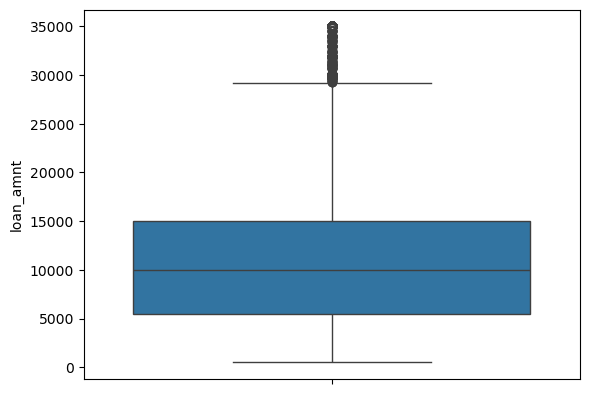

In [48]:
sns.boxplot(loan.loan_amnt)

In [49]:
list(loan.columns)

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'dti',
 'pub_rec',
 'pub_rec_bankruptcies',
 'year',
 'month']

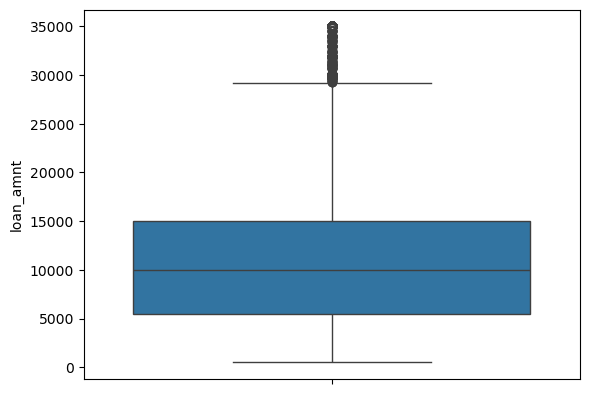

In [50]:
sns.boxplot(loan.loan_amnt)
plt.show()

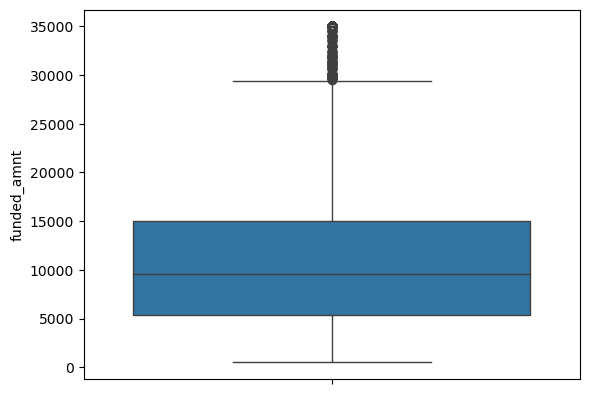

In [51]:
sns.boxplot(loan.funded_amnt)
plt.show()

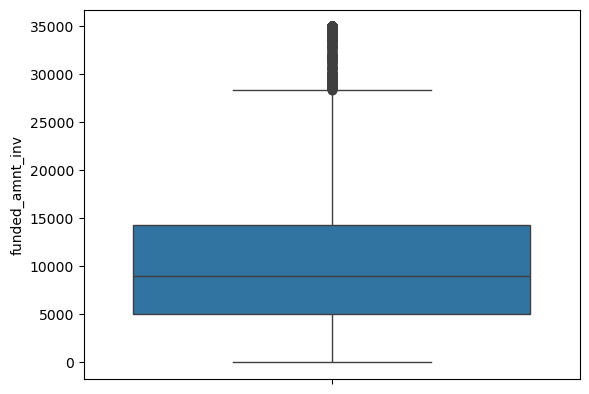

In [52]:
sns.boxplot(loan.funded_amnt_inv)
plt.show()

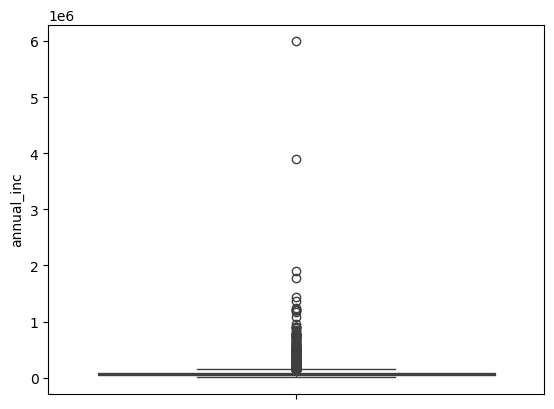

In [53]:
sns.boxplot(loan.annual_inc)
plt.show()

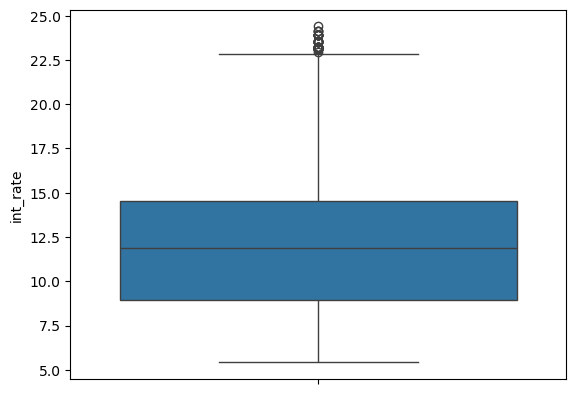

In [54]:
sns.boxplot(loan.int_rate)
plt.show()

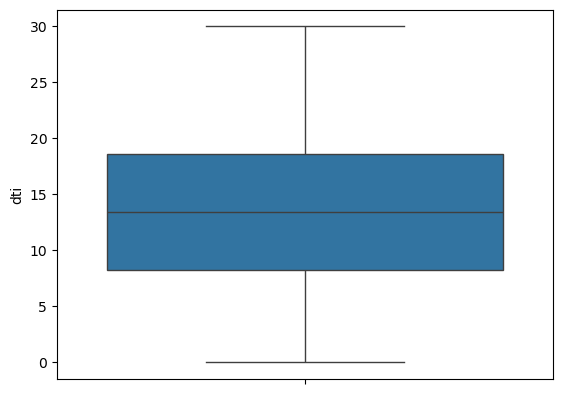

In [55]:
sns.boxplot(loan.dti)
plt.show()

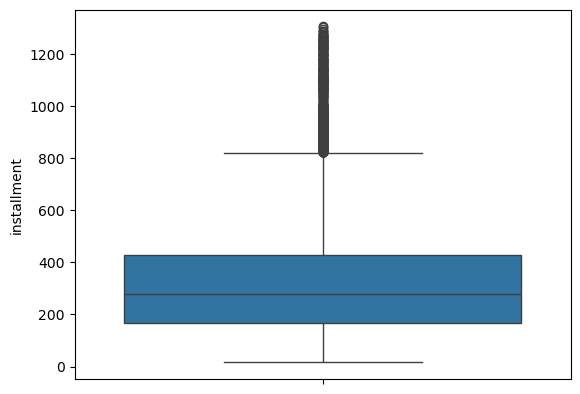

In [56]:
sns.boxplot(loan.installment)
plt.show()

In [57]:
# From the above plot analysis, we can see outliers present.
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan =remove_outliers_iqr(loan, outliers_columns_set1,1.5)
loan =remove_outliers_iqr(loan, outliers_columns_set2,1.5)

In [58]:
loan['loan_amnt'].describe()

count   33191.00
mean     9820.84
std      5809.60
min       500.00
25%      5000.00
50%      9000.00
75%     13750.00
max     29000.00
Name: loan_amnt, dtype: float64

In [59]:
list(loan.columns)

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'dti',
 'pub_rec',
 'pub_rec_bankruptcies',
 'year',
 'month']

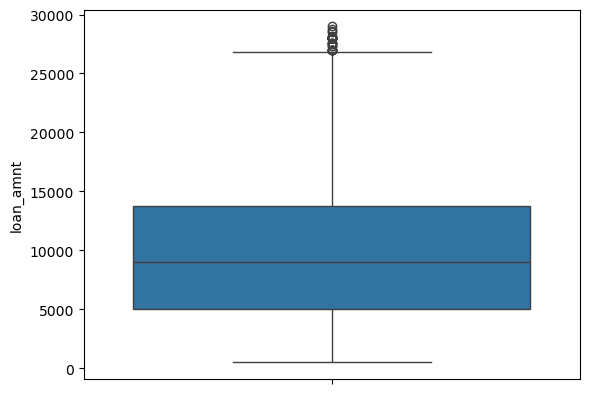

In [60]:
# Lets plot a box plot again to see the results
sns.boxplot(loan.loan_amnt)
plt.show()

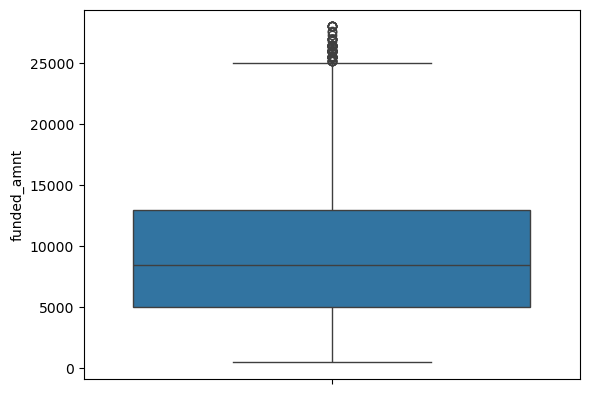

In [61]:
sns.boxplot(loan.funded_amnt)
plt.show()

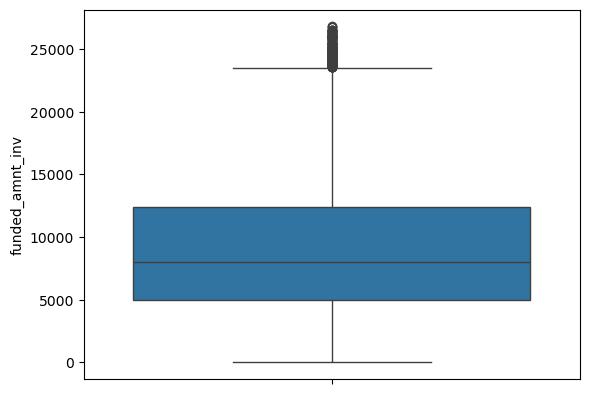

In [62]:
sns.boxplot(loan.funded_amnt_inv)
plt.show()

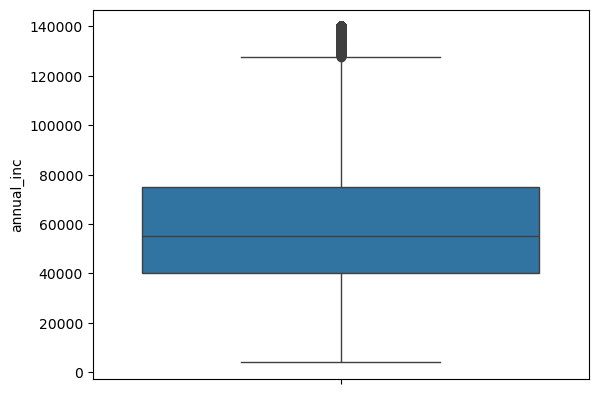

In [63]:
sns.boxplot(loan.annual_inc)
plt.show()

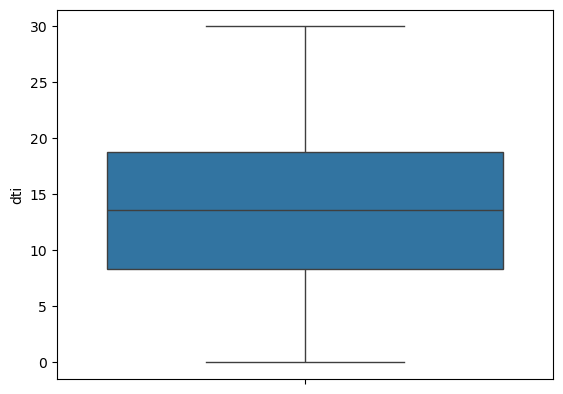

In [64]:
sns.boxplot(loan.dti)
plt.show()

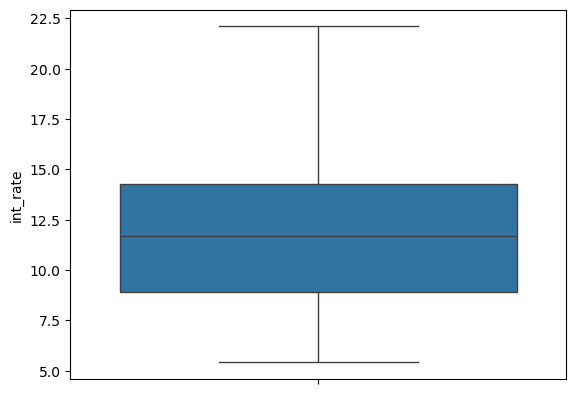

In [65]:
sns.boxplot(loan.int_rate)
plt.show()

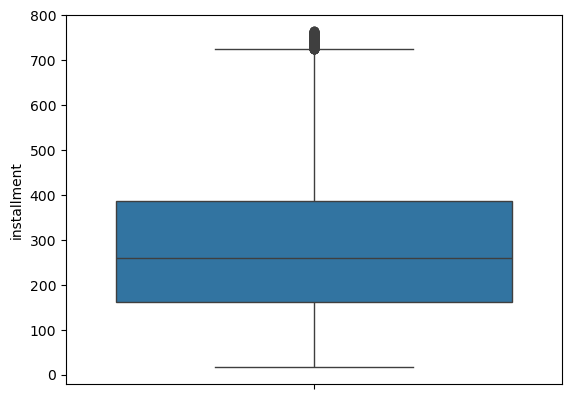

In [66]:
sns.boxplot(loan.installment)
plt.show()

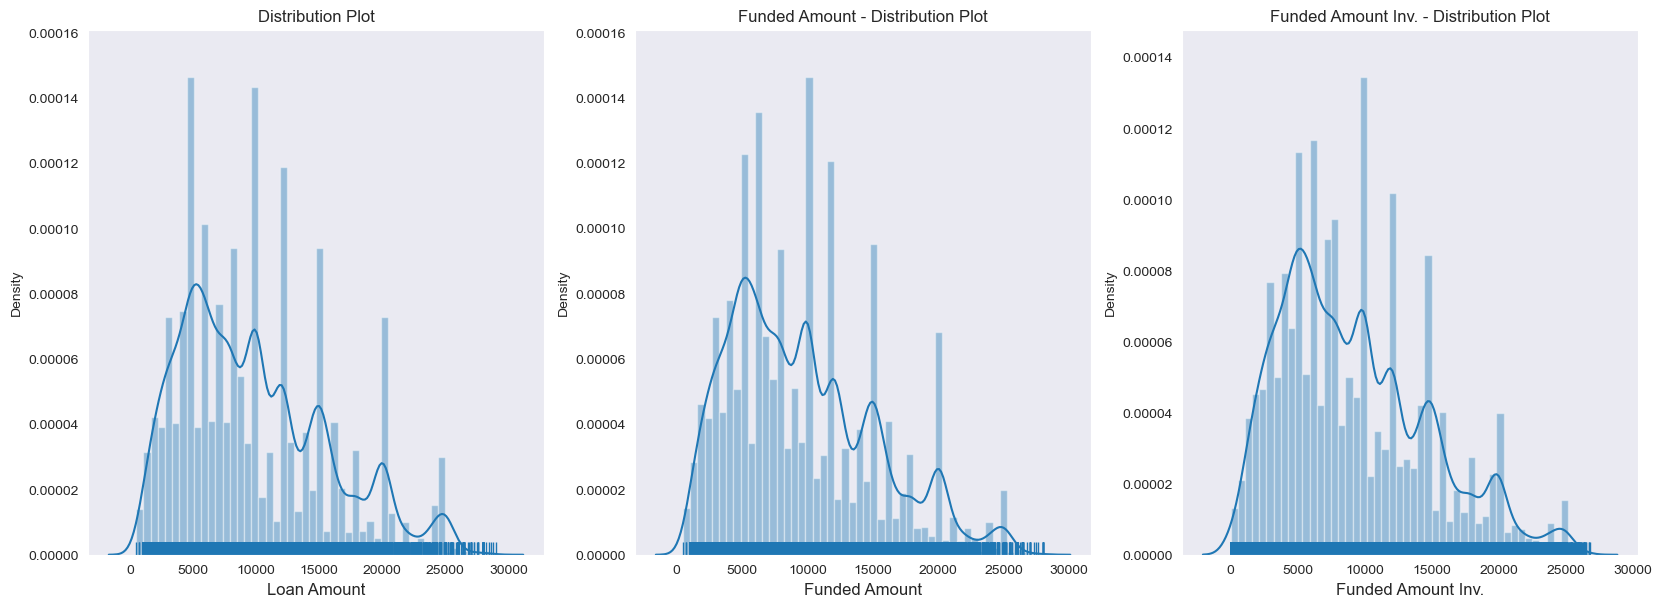

In [67]:
plt.figure(figsize=(20,15))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax1 = sns.distplot(loan['loan_amnt'],rug = True)
ax1.set_title('Distribution Plot',fontsize=12)
ax1.set_xlabel('Loan Amount',fontsize=12)
# subplot 2
plt.subplot(2, 3, 2)
ax1 = sns.distplot(loan['funded_amnt'],rug = True)
ax1.set_title('Funded Amount - Distribution Plot',fontsize=12)
ax1.set_xlabel('Funded Amount',fontsize=12)
# subplot 2
plt.subplot(2, 3, 3)
ax1 = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax1.set_title('Funded Amount Inv. - Distribution Plot',fontsize=12)
ax1.set_xlabel('Funded Amount Inv.',fontsize=12)
plt.show()

# Distribution of amounts for all three looks very much similar.

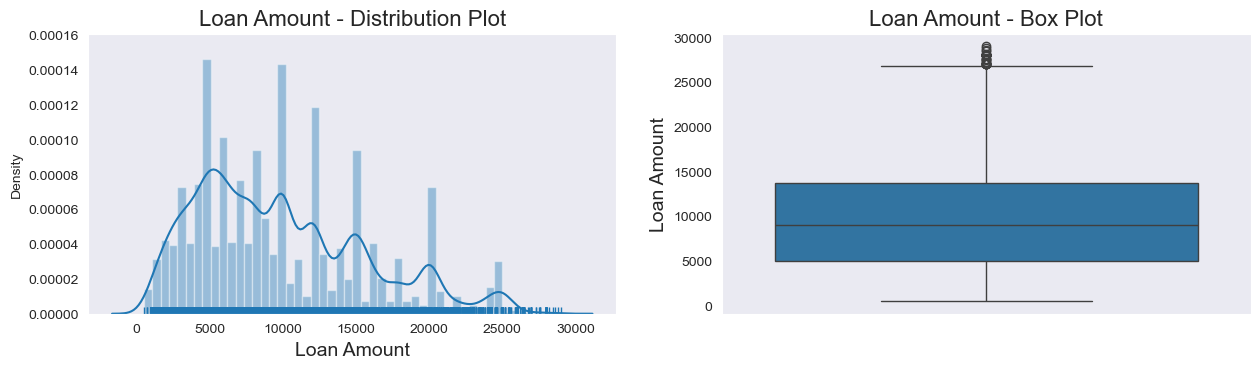

In [68]:
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 2, 1)
ax1 = sns.distplot(loan['loan_amnt'],rug = True)
ax1.set_title('Loan Amount - Distribution Plot',fontsize=16)
ax1.set_xlabel('Loan Amount',fontsize=14)
# subplot 2
plt.subplot(2, 2, 2)
ax1 = sns.boxplot(y=loan['loan_amnt'])
ax1.set_title('Loan Amount - Box Plot',fontsize=16)
ax1.set_ylabel('Loan Amount',fontsize=14)
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000 with some jump in the 20000 mark

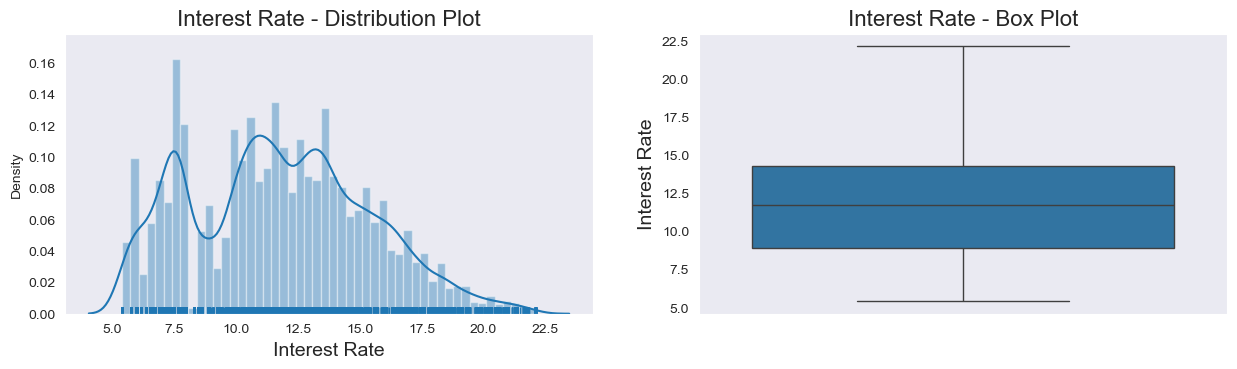

In [69]:
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 2, 1)
ax1 = sns.distplot(loan['int_rate'],rug = True)
ax1.set_title('Interest Rate - Distribution Plot',fontsize=16)
ax1.set_xlabel('Interest Rate',fontsize=14)
# subplot 2
plt.subplot(2, 2, 2)
ax1 = sns.boxplot(y=loan['int_rate'])
ax1.set_title('Interest Rate - Box Plot',fontsize=16)
ax1.set_ylabel('Interest Rate',fontsize=14)
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

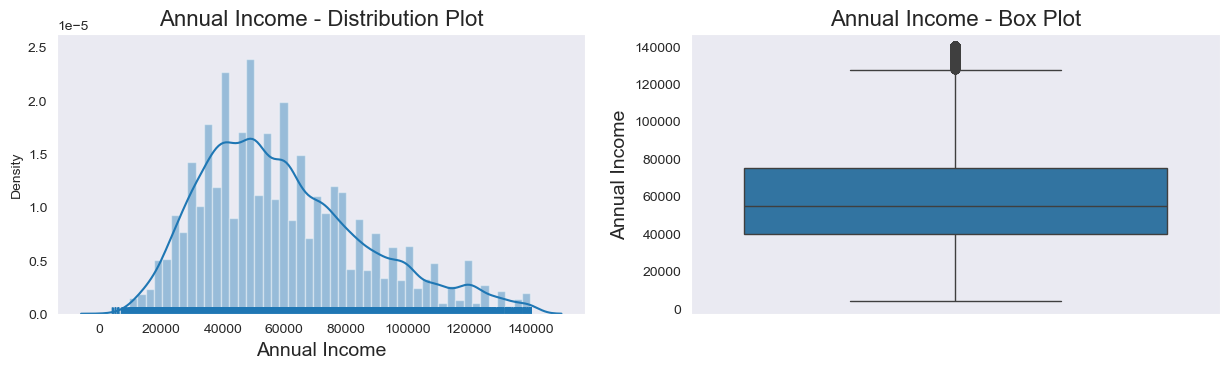

In [70]:
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 2, 1)
ax1 = sns.distplot(loan['annual_inc'],rug = True)
ax1.set_title('Annual Income - Distribution Plot',fontsize=16)
ax1.set_xlabel('Annual Income',fontsize=14)
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax1 = sns.boxplot(y=loan['annual_inc'])
ax1.set_title('Annual Income - Box Plot',fontsize=16)
ax1.set_ylabel('Annual Income',fontsize=14)
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

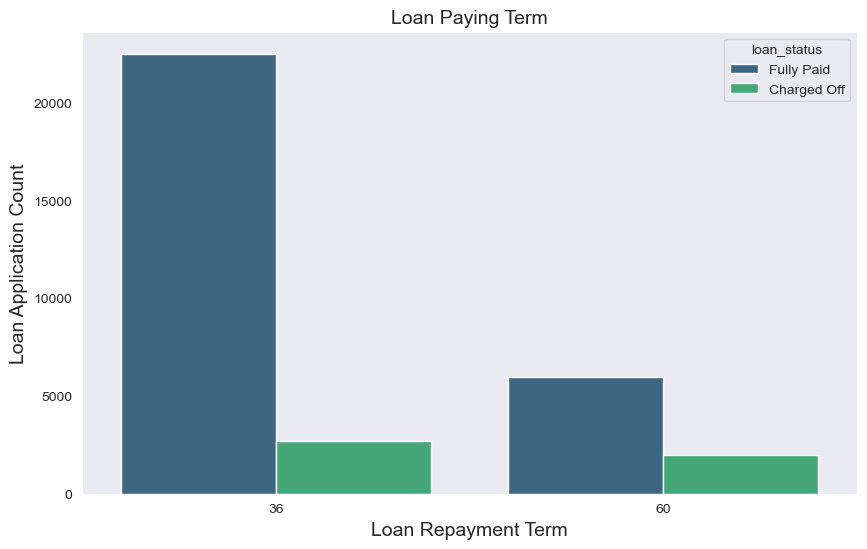

In [71]:
plt.figure(figsize=(10,6))
ax1 = sns.countplot(x="term",data=loan,hue='loan_status',palette='viridis')
ax1.set_title('Loan Paying Term',fontsize=14)
ax1.set_xlabel('Loan Repayment Term',fontsize=14)
ax1.set_ylabel('Loan Application Count',fontsize=14)      

plt.show()

Text(0, 0.5, 'Loan Application Count')

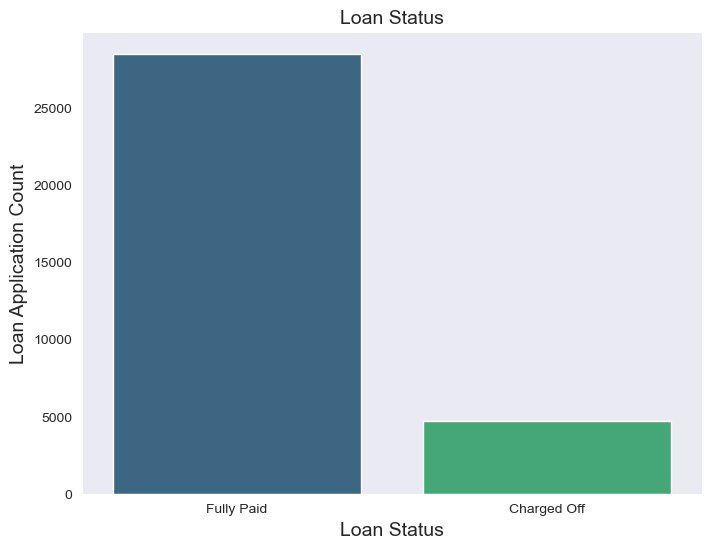

In [72]:
plt.figure(figsize=(8,6))
ax1 = sns.countplot(x="loan_status",data=loan,palette = 'viridis')
ax1.set_title('Loan Status',fontsize=14)
ax1.set_xlabel('Loan Status',fontsize=14)
ax1.set_ylabel('Loan Application Count',fontsize=14)

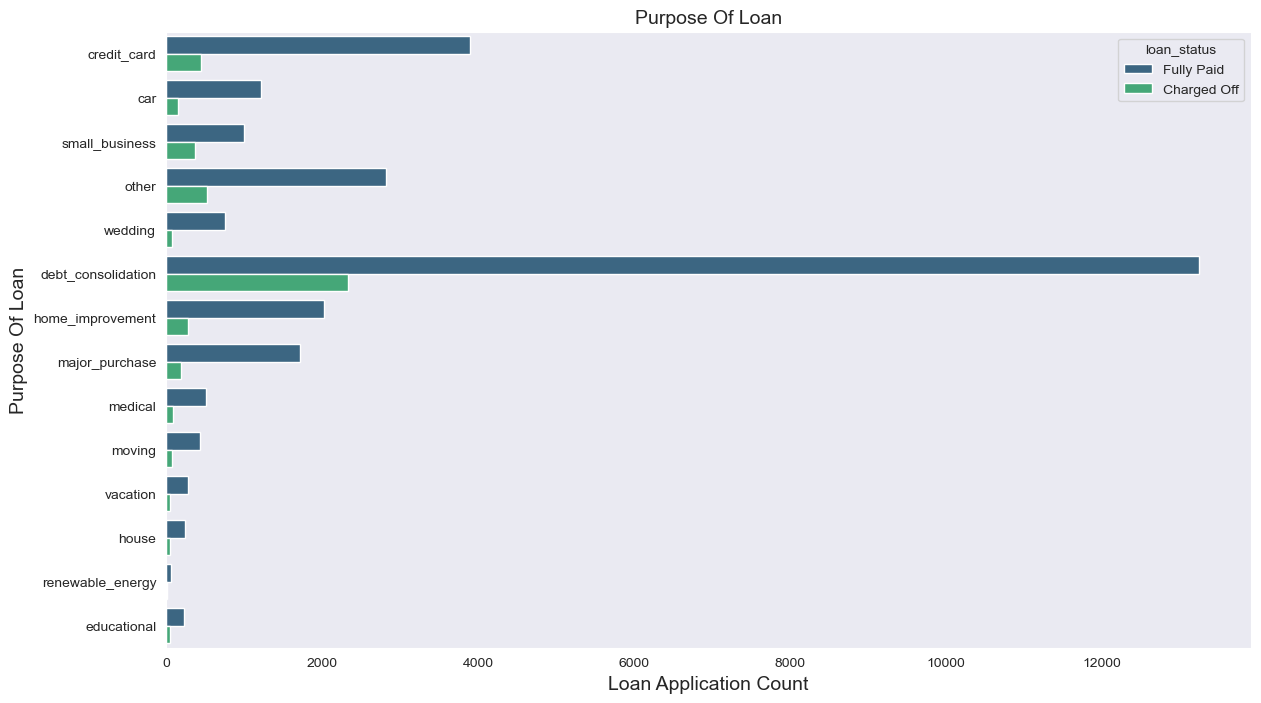

In [73]:
plt.figure(figsize=(14,8))
ax1 = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='viridis')
ax1.set_title('Purpose Of Loan',fontsize=14)
ax1.set_ylabel('Purpose Of Loan',fontsize=14)
ax1.set_xlabel('Loan Application Count',fontsize=14)      
plt.show()

# Observation
# Debt consolidation has the highest Loan count & credit card has the second most loan count.
# Debt consolidation has the highest charged off count as well.

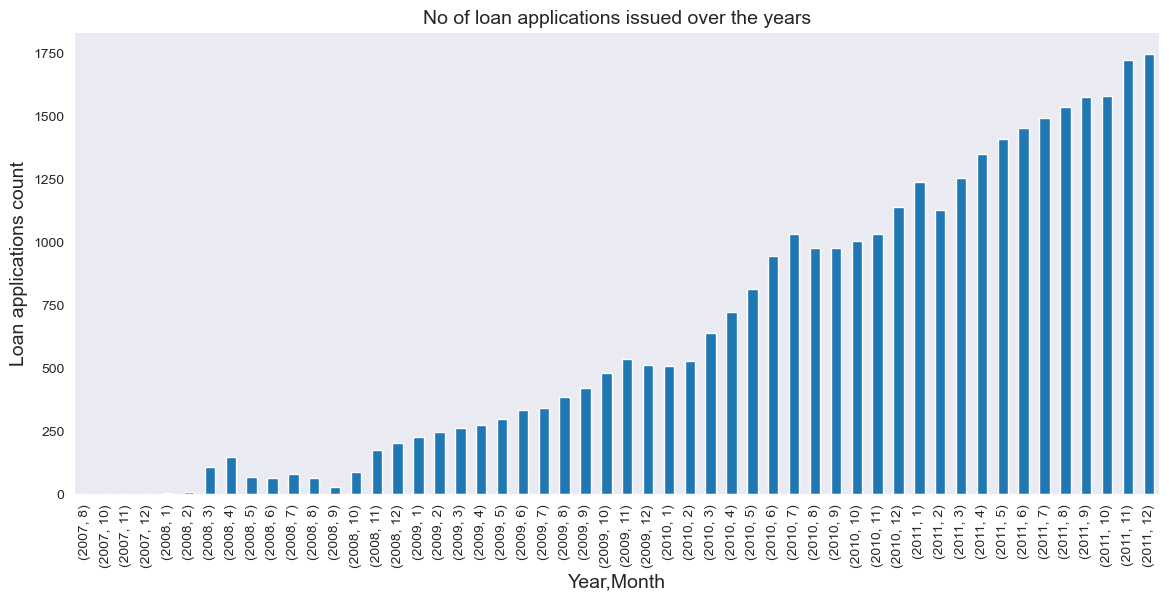

In [74]:
# Let us look into number of loans which were approved every year/month
plt.figure(figsize=(14,6))
loan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14)
plt.xlabel('Year,Month',fontsize=14)      
plt.title("No of loan applications issued over the years",fontsize=14)
plt.show()


# Observation is that the loan application count is increasing every passing year.


<Axes: xlabel='home_ownership'>

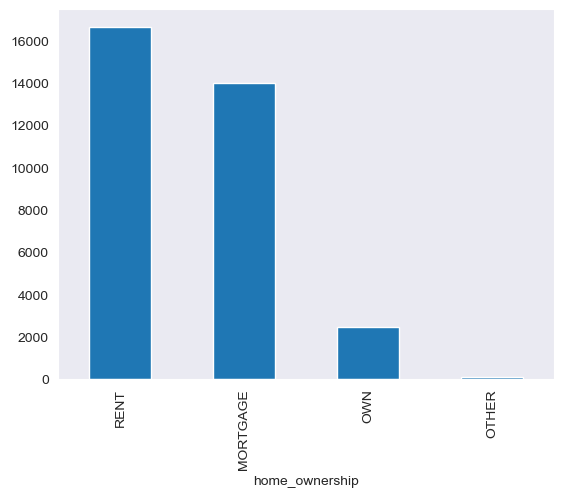

In [75]:
loan['home_ownership'].value_counts().plot.bar()

<Axes: xlabel='purpose'>

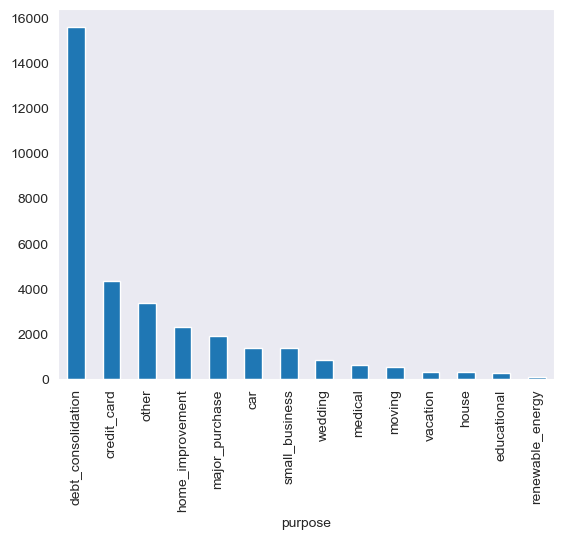

In [76]:
loan['purpose'].value_counts().plot.bar()

### 3.4 Bi-Variate Analysis

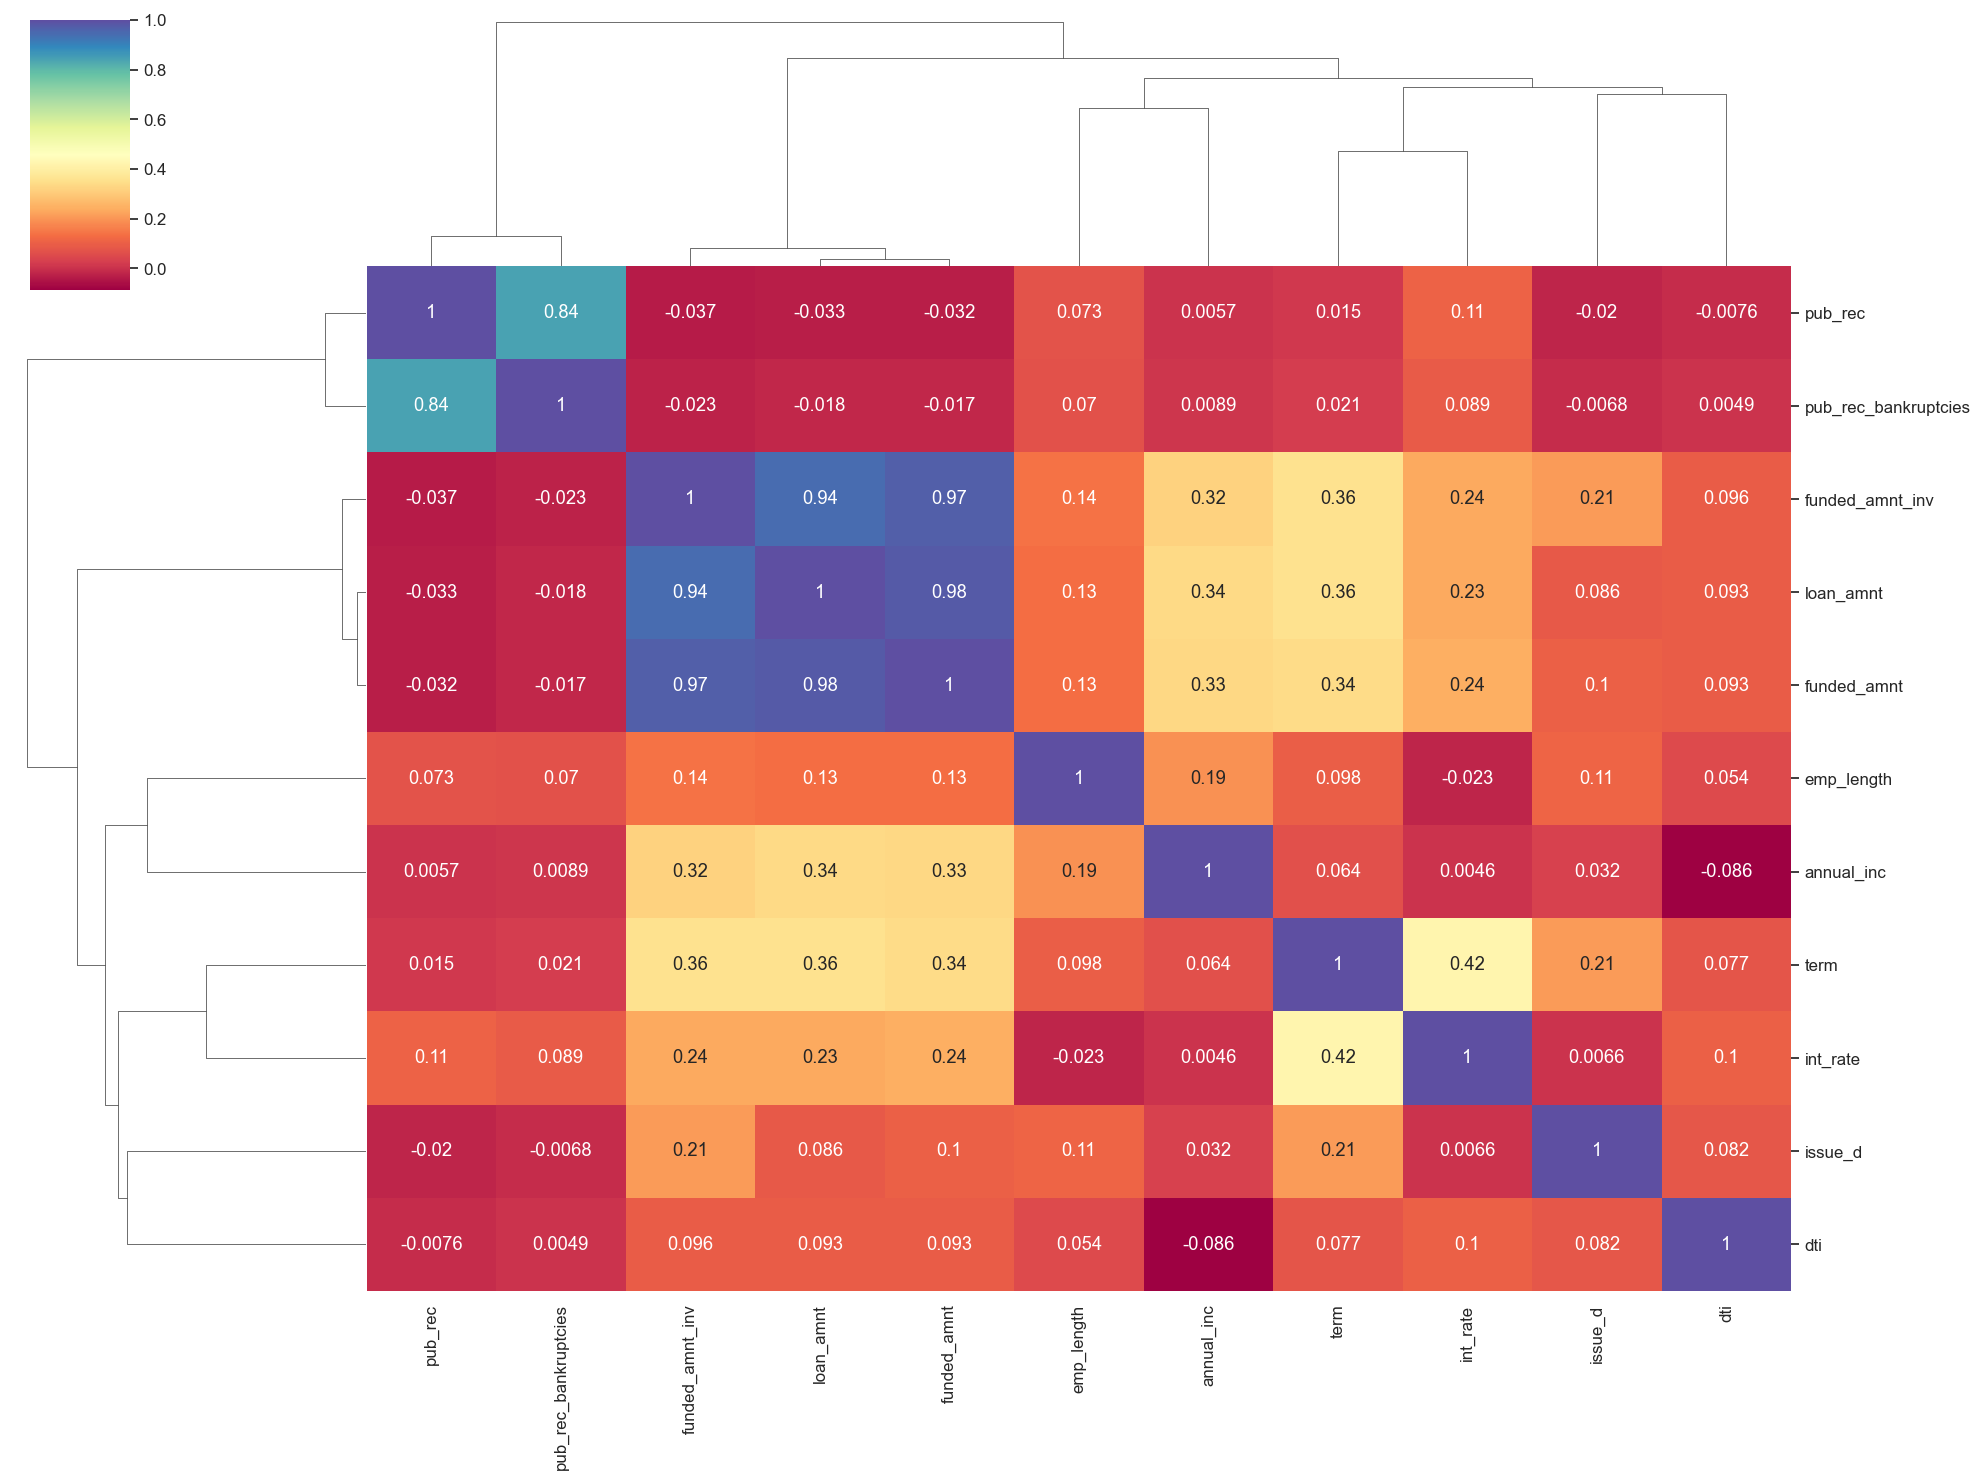

In [77]:
loan1 = loan
drop_columns = ['installment', 'id', 'year', 'month']
loan1 = loan1.drop(columns = drop_columns)
loan1 = loan1.apply(pd.to_numeric, errors='coerce')
loan1 = loan1.dropna(axis=1, how='all')
loan_corr = loan1.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_corr,annot=True,figsize=(20, 15),cmap="Spectral")
plt.show()

# We can observe that Loan amount, Investor Funds, Funded amount are Positively correlated.
# Term has a Positive correlation with Interest Rate
# There is a positive correlation between annual income and employment years.

# Annual income is negatively correalted with DTI
# Loan amount, Investor Funds, Funded amount have a Negative correlation with Pubic Record Bankruptcy
# Employment length is negatively correlated to Interest Rate

In [78]:
# categorise loan amounts, Annual Income, DTI, Interest rates into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

loan['int_rate_bin'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

loan['dti_bin'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [79]:
inc_range_vs_loan = loan.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Charged_off_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Charged_off_Proportion', ascending=False)

loan_status annual_inc_bin  Charged Off  Fully Paid  Total  \
0                  0-20000          186         783    969   
1              20000-40000         1384        6543   7927   
2              40000-60000         1595        9028  10623   
3              60000-80000          871        6010   6881   
4                  80000 +          678        6113   6791   

loan_status  Charged_off_Proportion  
0                              0.19  
1                              0.17  
2                              0.15  
3                              0.13  
4                              0.10

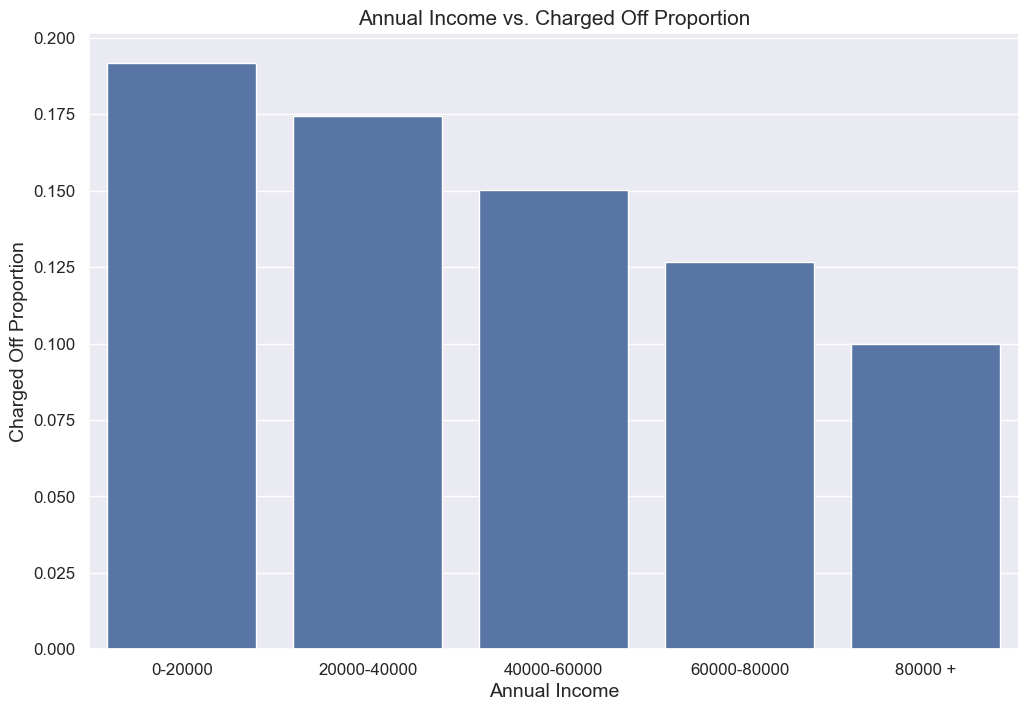

In [80]:
# Let's draw a Barplot to visualize the data better
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs. Charged Off Proportion',fontsize=15)
ax1=sns.barplot(x='annual_inc_bin', y='Charged_off_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Charged Off Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.

In [81]:
grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Charged_off_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Charged_off_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.

loan_status grade  Charged Off  Fully Paid  Total  Charged_off_Proportion
6               G           55         104    159                    0.35
5               F          220         480    700                    0.31
4               E          557        1518   2075                    0.27
3               D          941        3329   4270                    0.22
2               C         1177        5702   6879                    0.17
1               B         1225        8857  10082                    0.12
0               A          539        8487   9026                    0.06

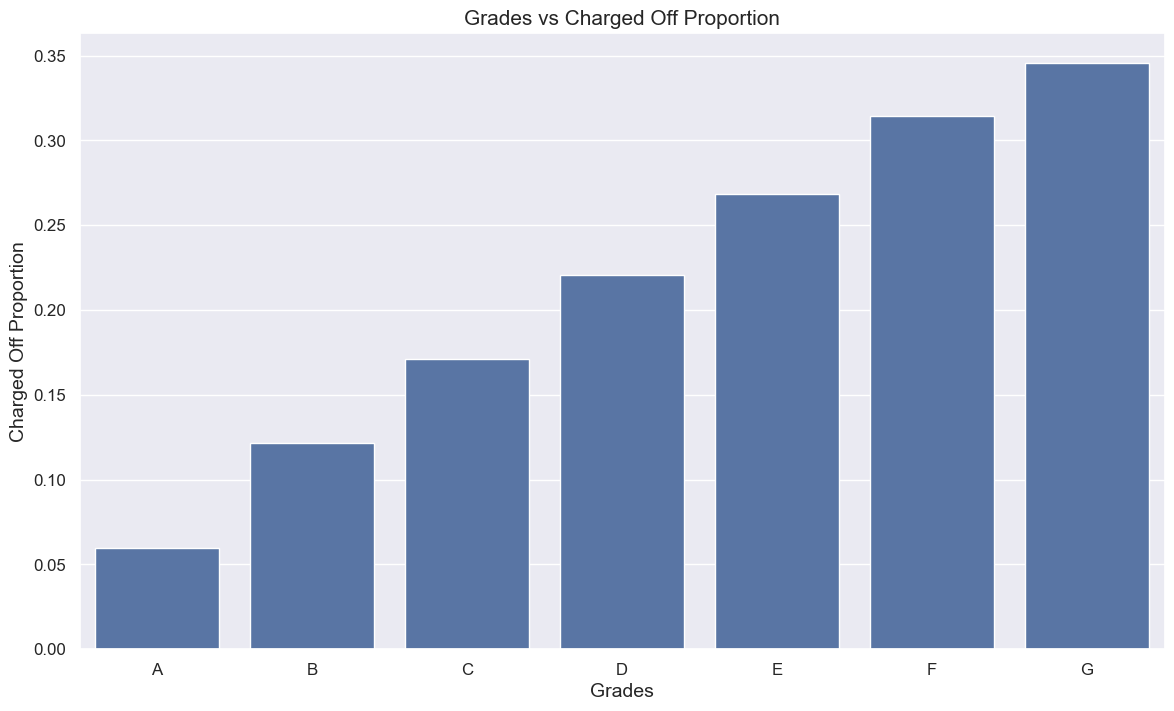

In [82]:
# Lets draw bar plots on data calculated above.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Charged Off Proportion',fontsize=15)
ax1=sns.barplot(x='grade', y='Charged_off_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Charged Off Proportion',fontsize=14)
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.

In [83]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan.groupby(['int_rate_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Charged_off_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Charged_off_Proportion', ascending=False)

loan_status int_rate_bin  Charged Off  Fully Paid  Total  \
3                   16 +         1026        2712   3738   
2                12.5-16         1749        8318  10067   
1                  10-13         1045        6968   8013   
0                   0-10          716       10204  10920   

loan_status  Charged_off_Proportion  
3                              0.27  
2                              0.17  
1                              0.13  
0                              0.07

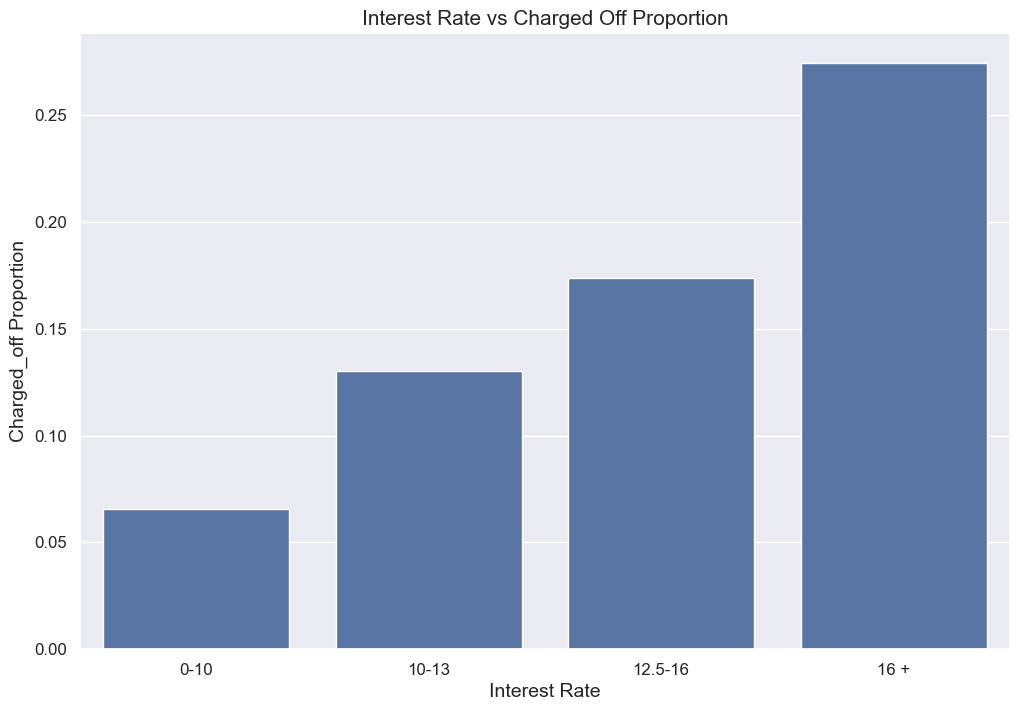

In [84]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Charged Off Proportion',fontsize=15)
ax1=sns.barplot(x='int_rate_bin', y='Charged_off_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Charged_off Proportion',fontsize=14)
plt.show()

# Observations:
# interest rate of less than 10% has very less chances of being charged off.
# interest rate more than 16% has a higher probability of being charged off as compared to others.

In [85]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Charged_off_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Charged_off_Proportion', ascending=False)

loan_status             purpose  Charged Off  Fully Paid  Total  \
11               small_business          366        1003   1369   
10             renewable_energy           16          67     83   
5                         house           49         249    298   
3                   educational           46         235    281   
9                         other          531        2823   3354   
7                       medical           95         510    605   
8                        moving           79         433    512   
2            debt_consolidation         2329       13253  15582   
12                     vacation           49         281    330   
4              home_improvement          277        2026   2303   
0                           car          150        1224   1374   
1                   credit_card          450        3894   4344   
6                major_purchase          195        1719   1914   
13                      wedding           82         760    842   

loan_status  Charged_off_Proportion  
11                             0.27  
10                             0.19  
5                              0.16  
3                              0.16  
9                              0.16  
7                              0.16  
8                              0.15  
2                              0.15  
12                             0.15  
4                              0.12  
0                              0.11  
1                              0.10  
6                              0.10  
13                             0.10

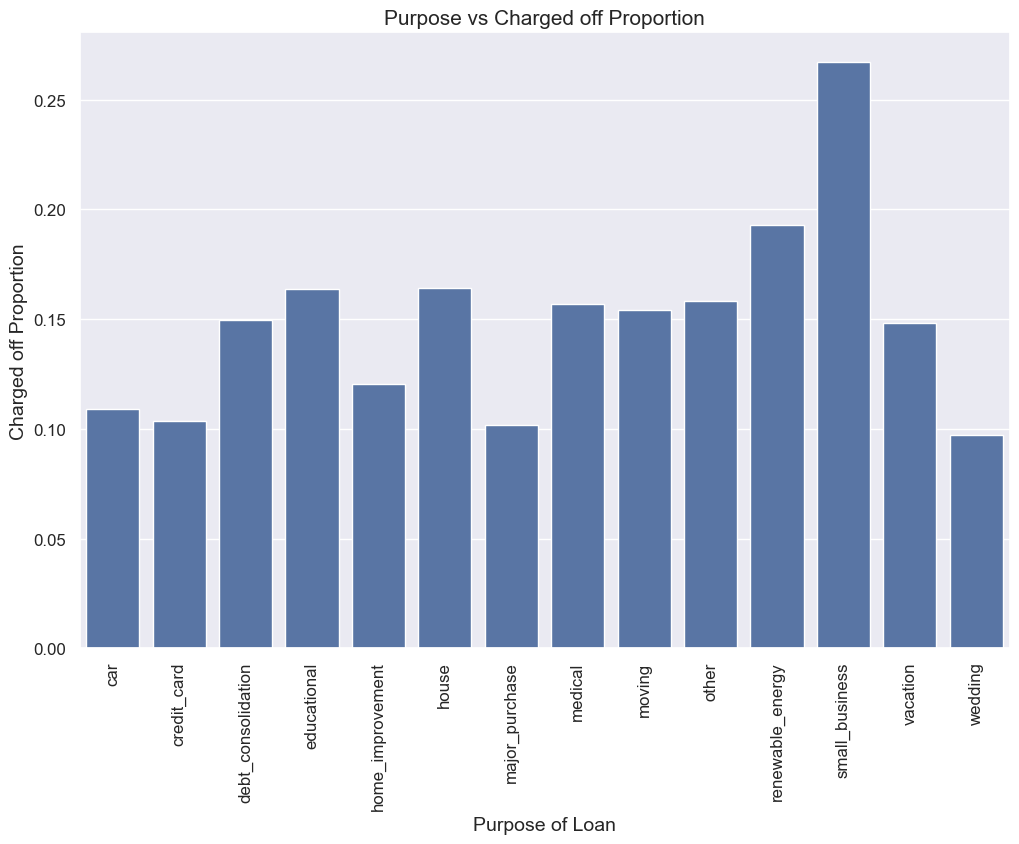

In [86]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Purpose vs Charged off Proportion',fontsize=15)
ax1=sns.barplot(x='purpose', y='Charged_off_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purpose of Loan',fontsize=14)
ax1.set_ylabel('Charged off Proportion',fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Observations:
# Small Business applicants have high chances of getting charged off.
# For renewable_energy, charged off proportion is better in comparison to others.

In [87]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Charged_off_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Charged_off_Proportion', ascending=False)

loan_status home_ownership  Charged Off  Fully Paid  Total  \
1                    OTHER           16          73     89   
3                     RENT         2488       14156  16644   
2                      OWN          355        2121   2476   
0                 MORTGAGE         1855       12127  13982   

loan_status  Charged_off_Proportion  
1                              0.18  
3                              0.15  
2                              0.14  
0                              0.13

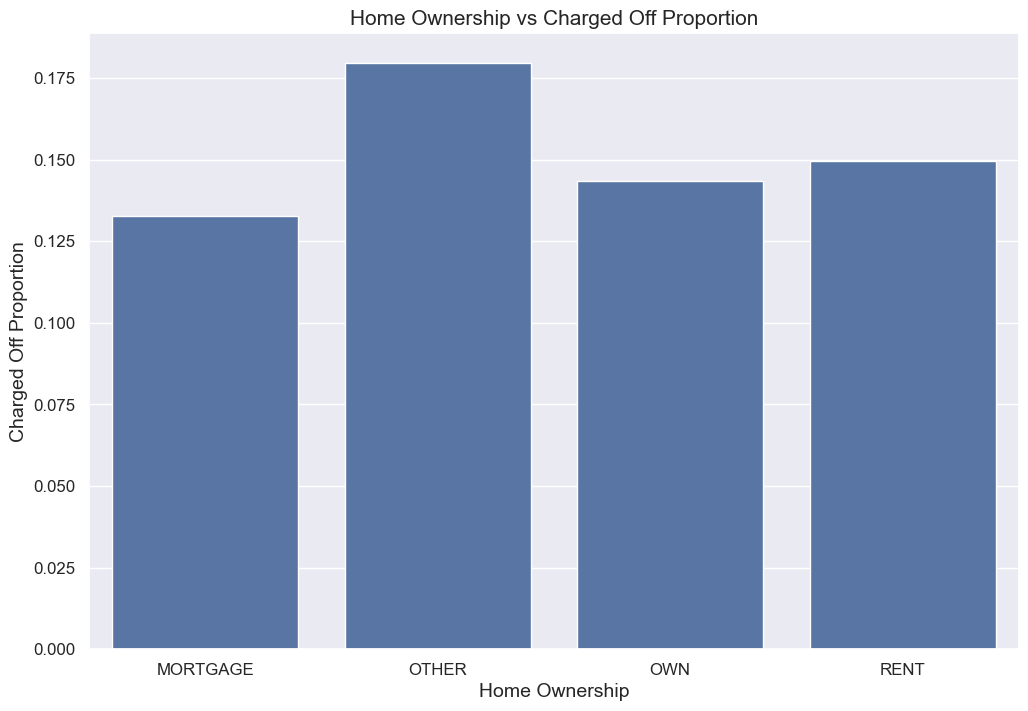

In [88]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Home Ownership vs Charged Off Proportion',fontsize=15)
ax1=sns.barplot(x='home_ownership', y='Charged_off_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14)
ax1.set_ylabel('Charged Off Proportion',fontsize=14)
plt.show()

# observation:
# Applicants who are in the Mortgage and Rent category have a higher probability of being charged off as the number of applicants are higher for these categories.

In [89]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan.groupby(['dti_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status dti_bin  Charged Off  Fully Paid  Total  Chargedoff_Proportion
4               25+          976        4910   5886                   0.17
3             15-20         1166        6529   7695                   0.15
2             10-15         1179        7151   8330                   0.14
0               0-5          495        3508   4003                   0.12
1             05-10          806        5781   6587                   0.12

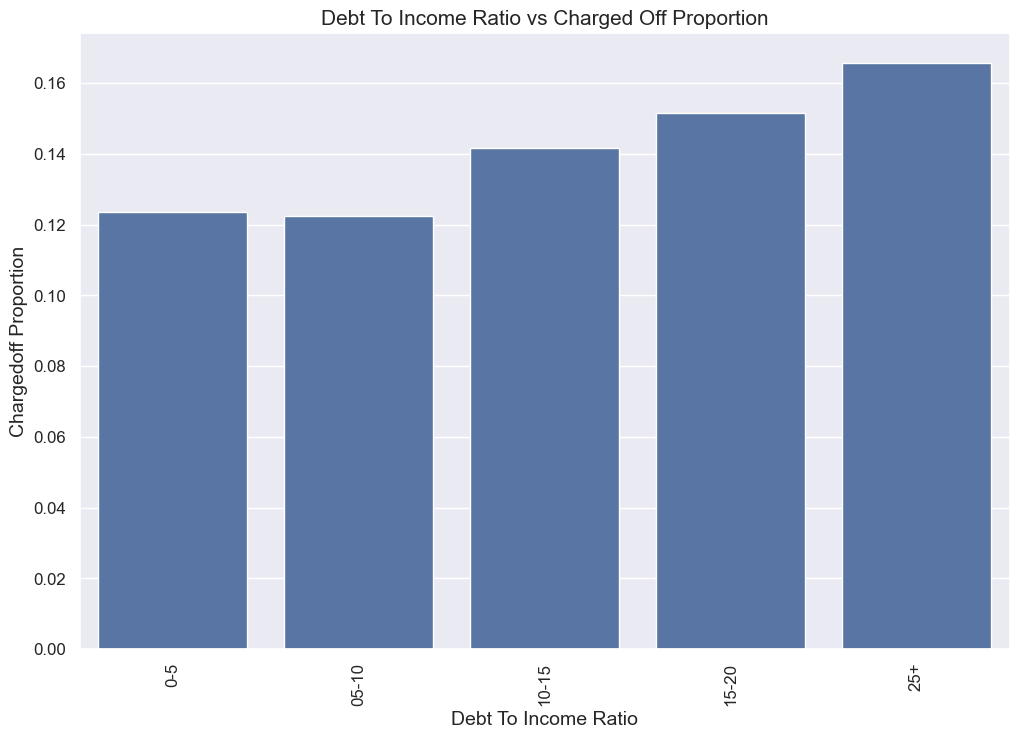

In [90]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Debt To Income Ratio vs Charged Off Proportion',fontsize=15)
ax1=sns.barplot(x='dti_bin', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Observation:
# Higher the DTI value, higher the risk of being Chargedoff and vice versa

In [91]:
# Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -

pub_rec_bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
2                            2.00            2           3      5   
1                            1.00          308        1137   1445   
0                            0.00         4404       27337  31741   

loan_status  Chargedoff_Proportion  
2                             0.40  
1                             0.21  
0                             0.14

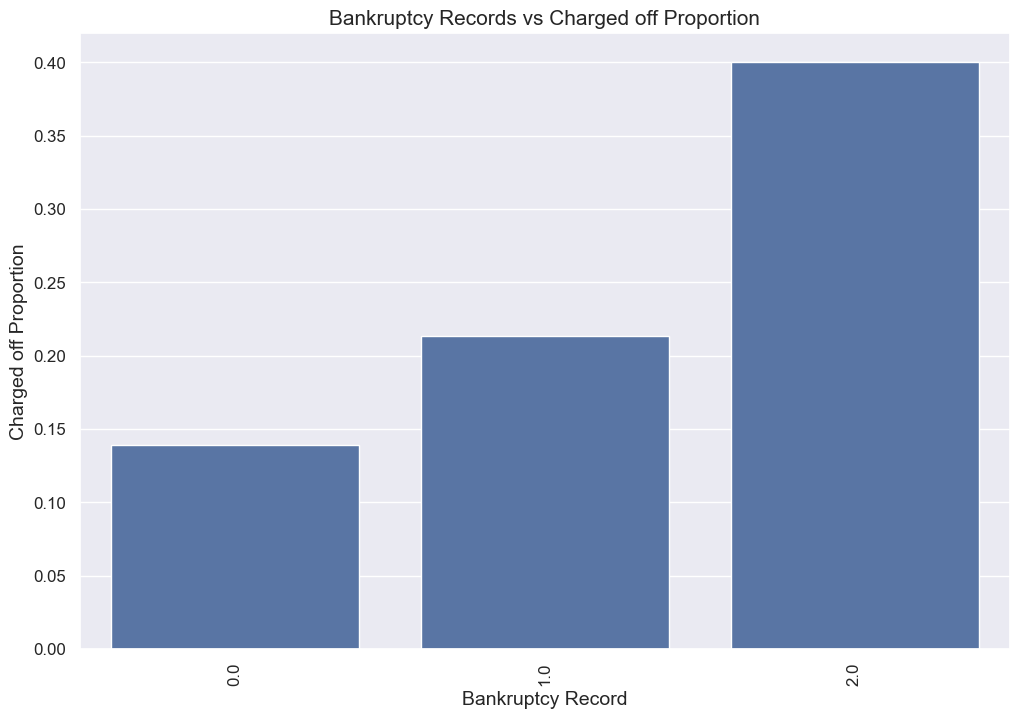

In [92]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Bankruptcy Records vs Charged off Proportion',fontsize=15)
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcy Record',fontsize=14)
ax1.set_ylabel('Charged off Proportion',fontsize=14)
plt.xticks(rotation=90)
plt.show()
# Observations:
# Bankruptcy Record value of 2 is having high risk on being charged off
# Similarly, Bankruptcy Record value of 0 has low risk on being charged off
# Lower the Bankruptcy, lower the risk is.

In [93]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion -

bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
2                            2.00            2           3      5   
1                            1.00          308        1137   1445   
0                            0.00         4404       27337  31741   

loan_status  Chargedoff_Proportion  
2                             0.40  
1                             0.21  
0                             0.14

In [94]:
# Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

year_vs_loan = loan.groupby(['year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
year_vs_loan['Total'] = year_vs_loan['Charged Off']+ year_vs_loan['Fully Paid']
year_vs_loan['Chargedoff_Proportion'] = year_vs_loan['Charged Off'] / year_vs_loan['Total']
year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status  year  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0            2007            2           5      7                   0.29
4            2011         2705       14788  17493                   0.15
1            2008          158         880   1038                   0.15
3            2010         1312        9012  10324                   0.13
2            2009          537        3792   4329                   0.12

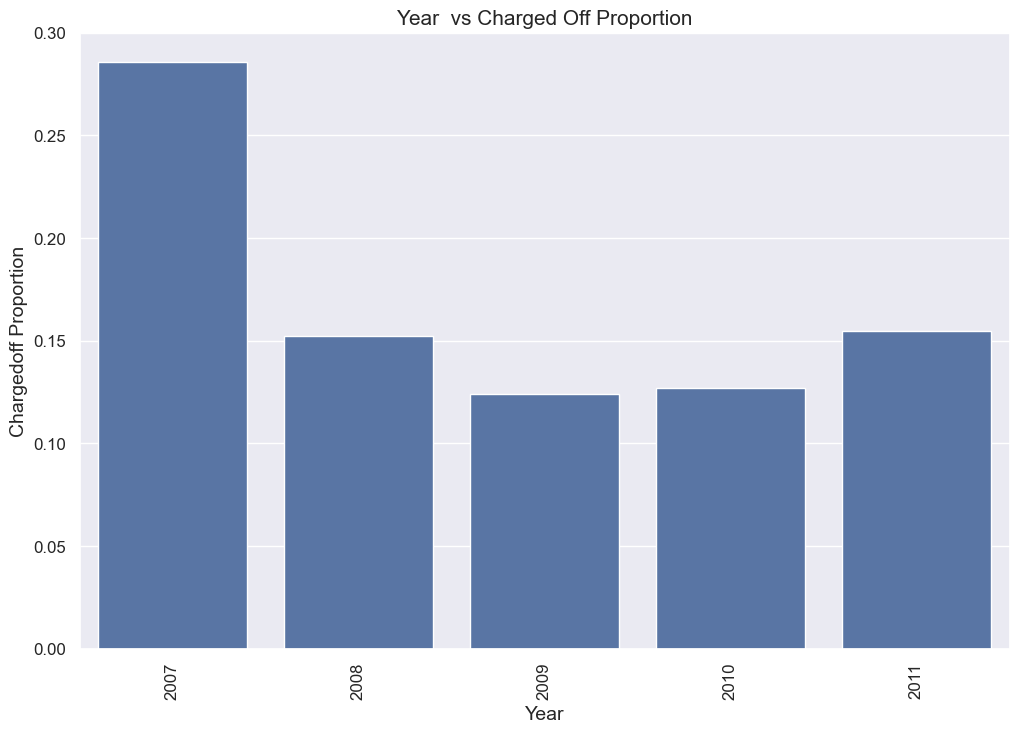

In [95]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Year  vs Charged Off Proportion',fontsize=15)
ax1=sns.barplot(x='year', y='Chargedoff_Proportion', data=year_vs_loan)
ax1.set_xlabel('Year',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Observation :
# Year 2007 is highest loan defaults.
# 2009 is having lowest loan defaults.


In [96]:
# Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

month_vs_loan = loan.groupby(['month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
month_vs_loan['Total'] = month_vs_loan['Charged Off']+ month_vs_loan['Fully Paid']
month_vs_loan['Charged_off_Proportion'] = month_vs_loan['Charged Off'] / month_vs_loan['Total']
month_vs_loan.sort_values('Charged_off_Proportion', ascending=False)


loan_status  month  Charged Off  Fully Paid  Total  Charged_off_Proportion
8                9          477        2531   3008                    0.16
11              12          567        3034   3601                    0.16
4                5          401        2188   2589                    0.15
9               10          462        2693   3155                    0.15
5                6          410        2390   2800                    0.15
10              11          494        2976   3470                    0.14
6                7          415        2534   2949                    0.14
7                8          405        2562   2967                    0.14
0                1          260        1724   1984                    0.13
3                4          317        2176   2493                    0.13
2                3          282        1981   2263                    0.12
1                2          224        1688   1912                    0.12

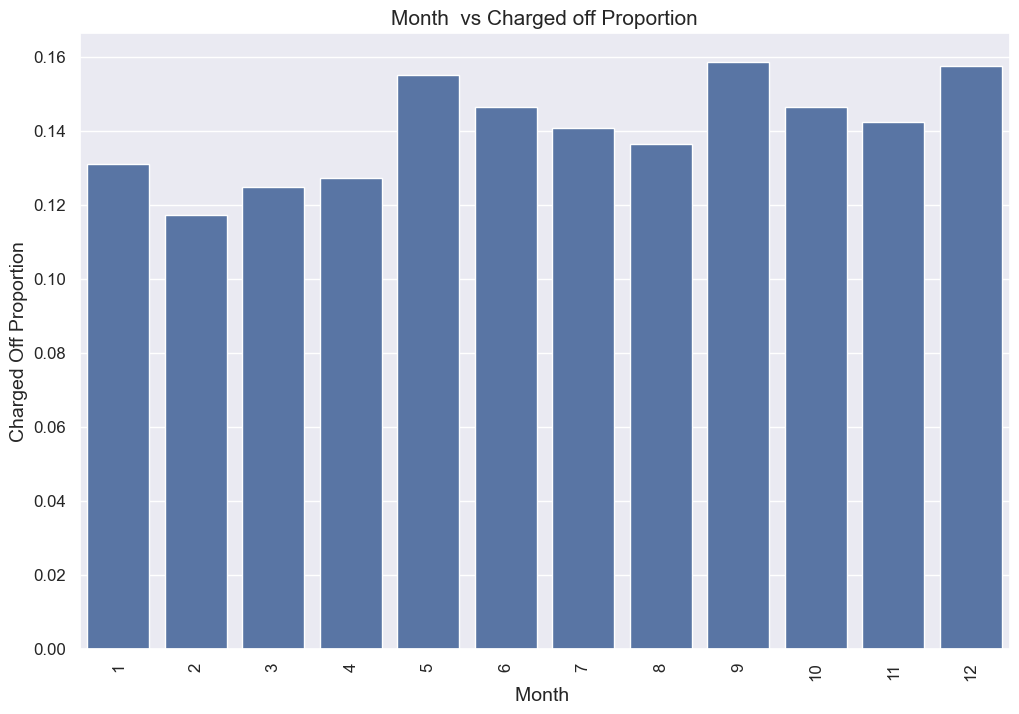

In [97]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Month  vs Charged off Proportion',fontsize=15)
ax1=sns.barplot(x='month', y='Charged_off_Proportion', data=month_vs_loan)
ax1.set_xlabel('Month ',fontsize=14)
ax1.set_ylabel('Charged Off Proportion',fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Observation
# Loans approved in the months of May, September and December have higher Loan defaulters.
# Loans approved in the month of February has the least no. of Loan defaulters

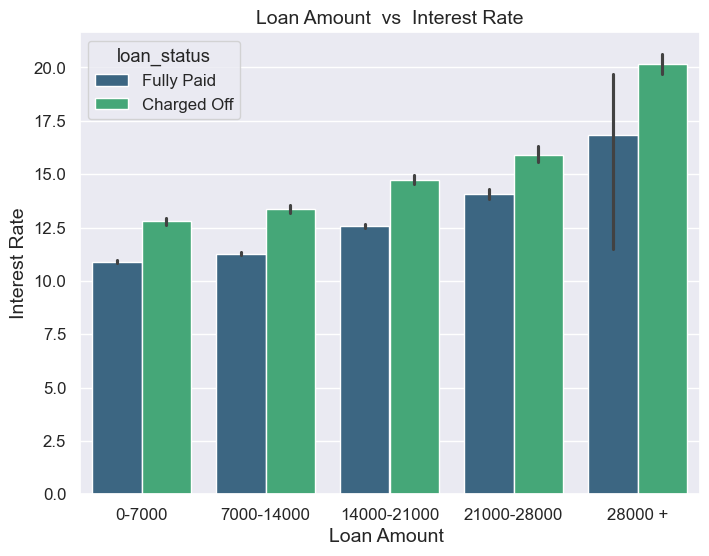

In [98]:
plt.figure(figsize=(8,6))
ax1 = sns.barplot(data =loan,x='loan_amnt_bin', y='int_rate', hue ='loan_status',palette="viridis")
ax1.set_title('Loan Amount  vs  Interest Rate',fontsize=14)
ax1.set_xlabel('Loan Amount ',fontsize=14)
ax1.set_ylabel('Interest Rate',fontsize=14)
plt.show()

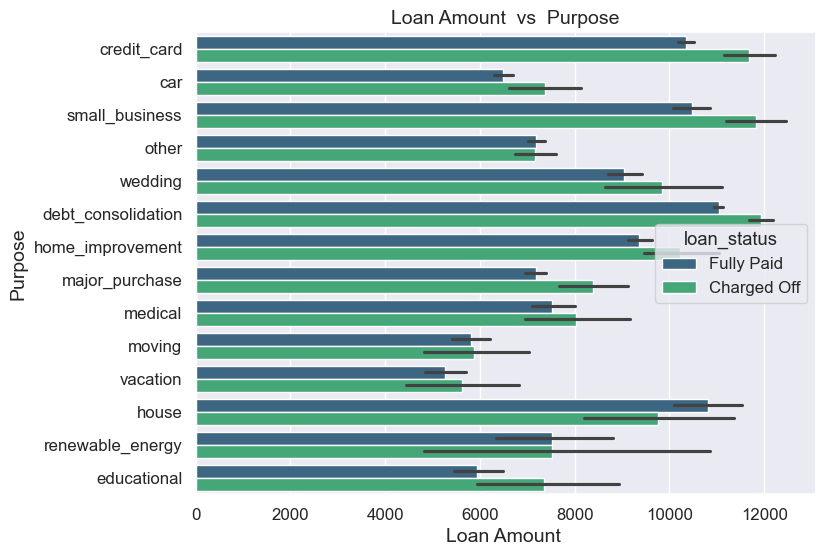

In [99]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1 = sns.barplot(data =loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="viridis")
ax1.set_title('Loan Amount  vs  Purpose',fontsize=14)
ax1.set_xlabel('Loan Amount ',fontsize=14)
ax1.set_ylabel('Purpose',fontsize=14)
plt.show()

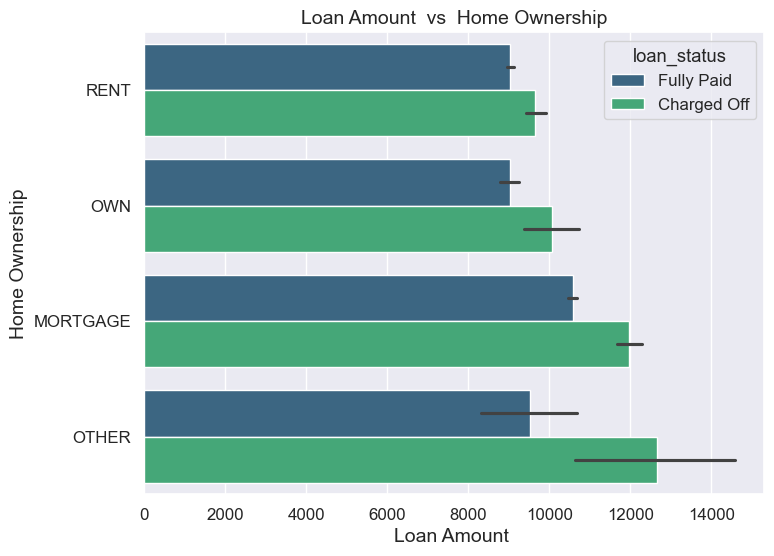

In [100]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_title('Loan Amount  vs  Home Ownership',fontsize=14)
ax1 = sns.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="viridis")
ax1.set_xlabel('Loan Amount ',fontsize=14)
ax1.set_ylabel('Home Ownership',fontsize=14)
plt.show()

<Axes: xlabel='year', ylabel='loan_amnt'>

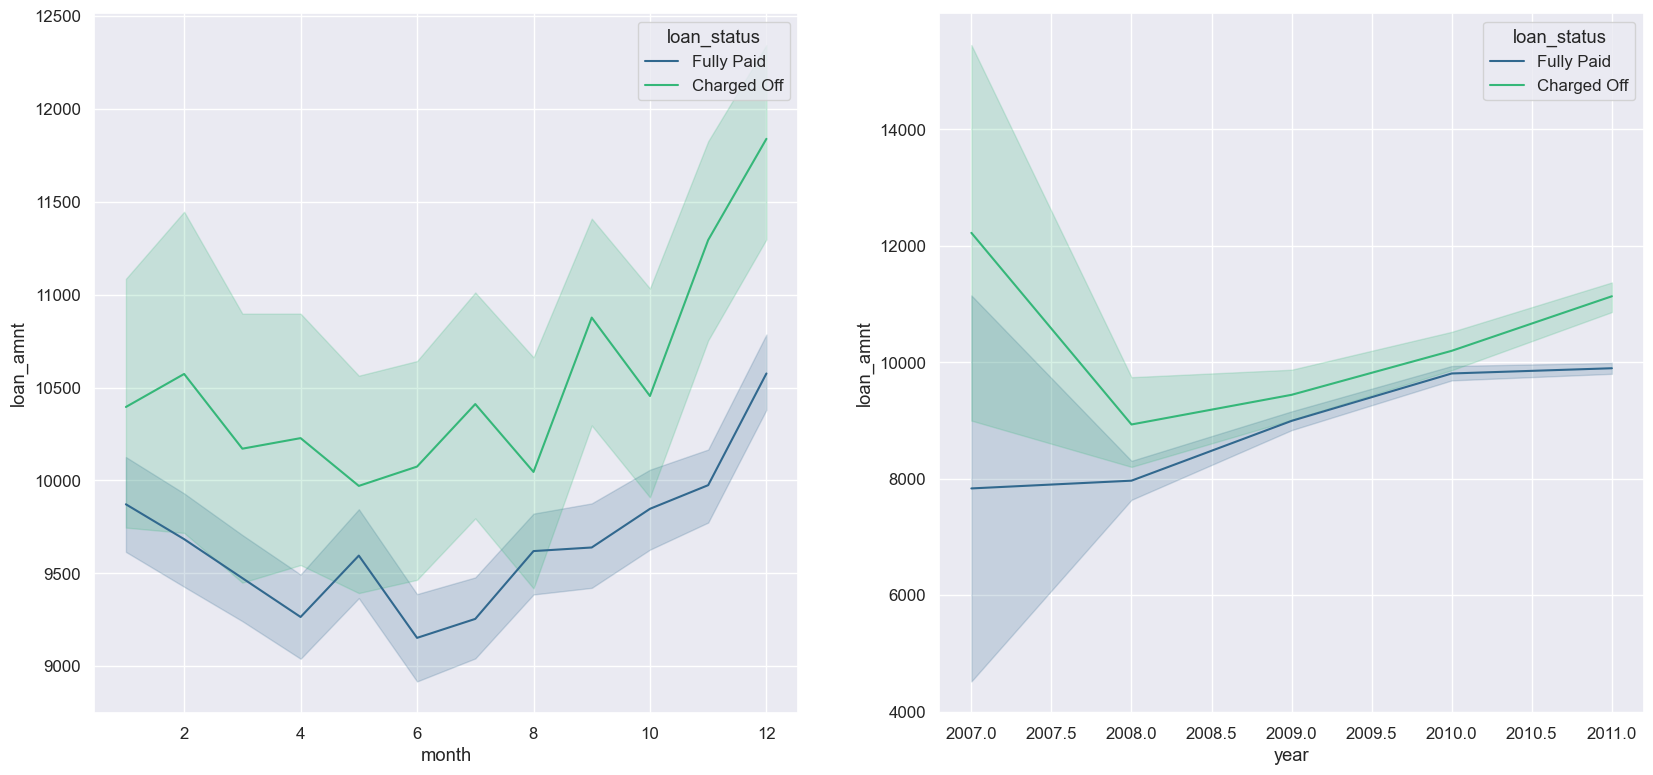

In [101]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan,y='loan_amnt', x='month', hue ='loan_status',palette="viridis")
plt.subplot(222)
sns.lineplot(data =loan,y='loan_amnt', x='year', hue ='loan_status',palette="viridis")

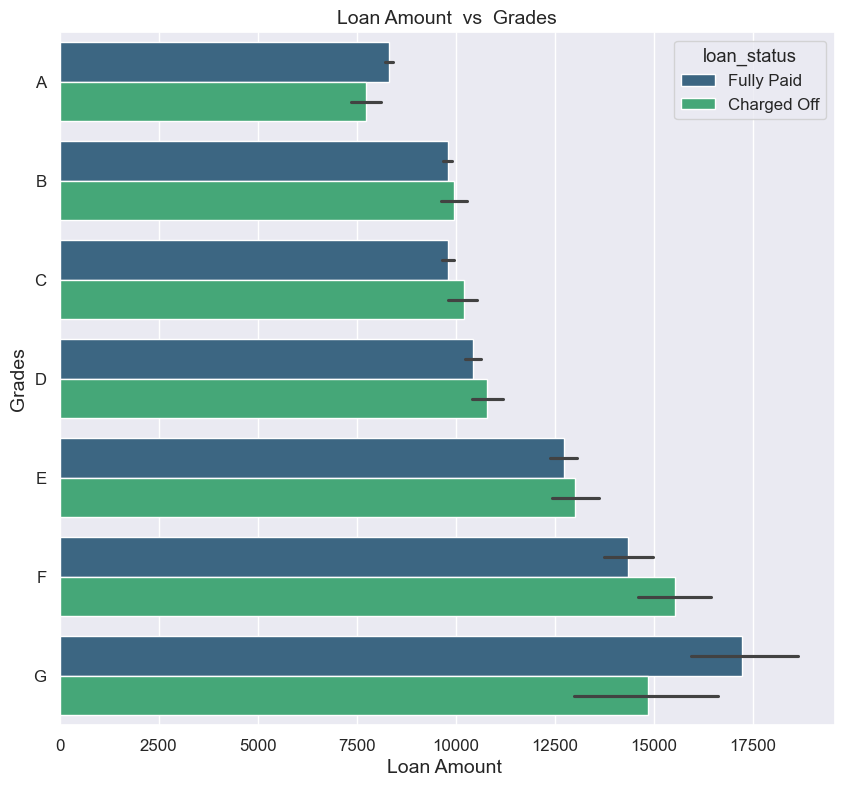

In [102]:
fig, ax1 = plt.subplots(figsize=(10, 9))
ax1.set_title('Loan Amount  vs  Grades',fontsize=14)
ax1 = sns.barplot(data =loan,x='loan_amnt', y='grade', hue ='loan_status',palette="viridis", order=['A','B','C','D','E','F','G'])
ax1.set_xlabel('Loan Amount ',fontsize=14)
ax1.set_ylabel('Grades',fontsize=14)
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

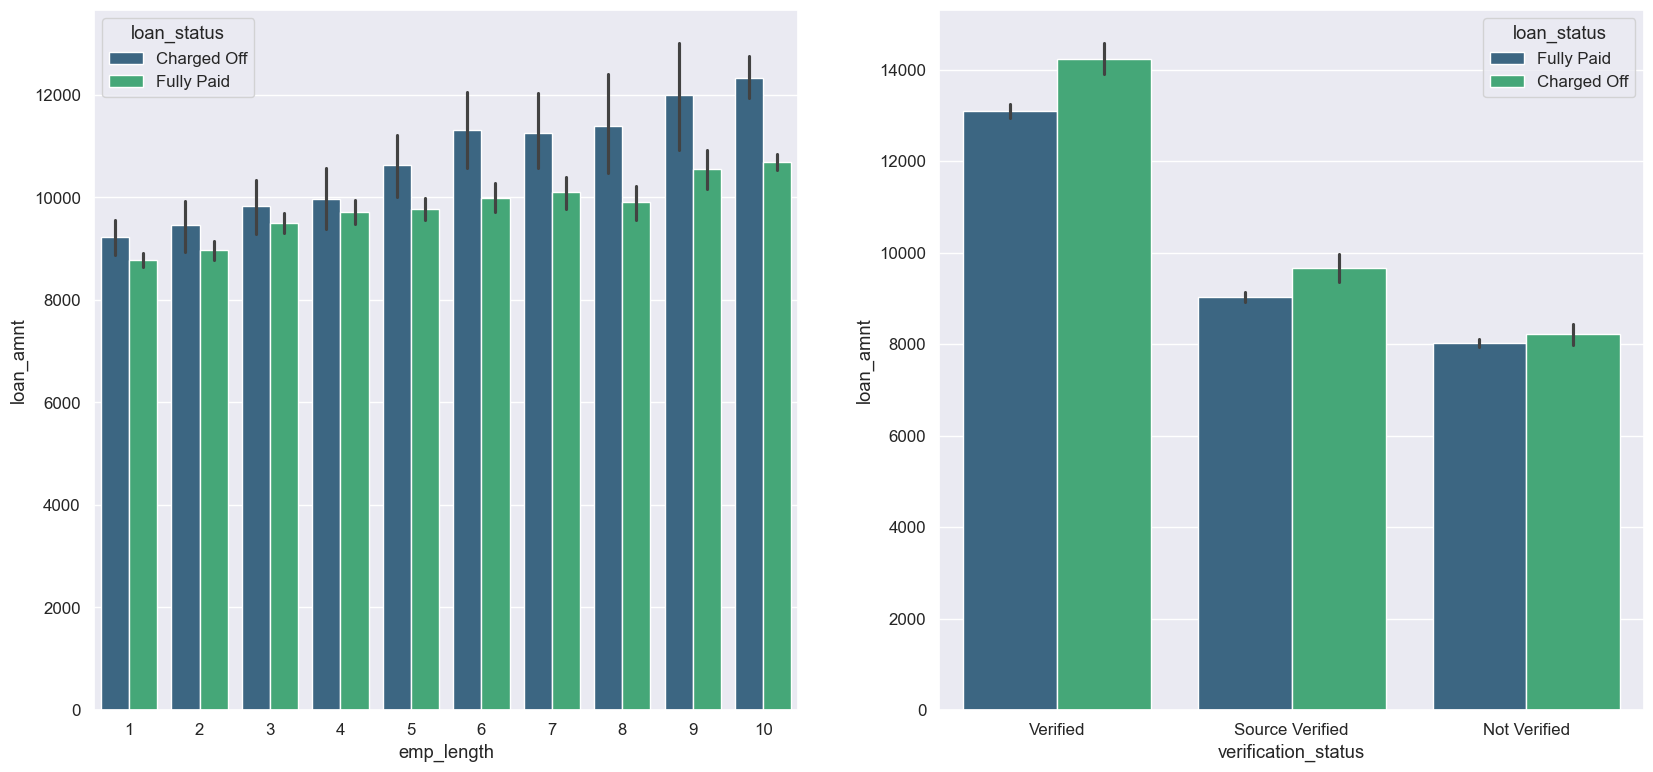

In [103]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="viridis")
plt.subplot(222)
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="viridis")

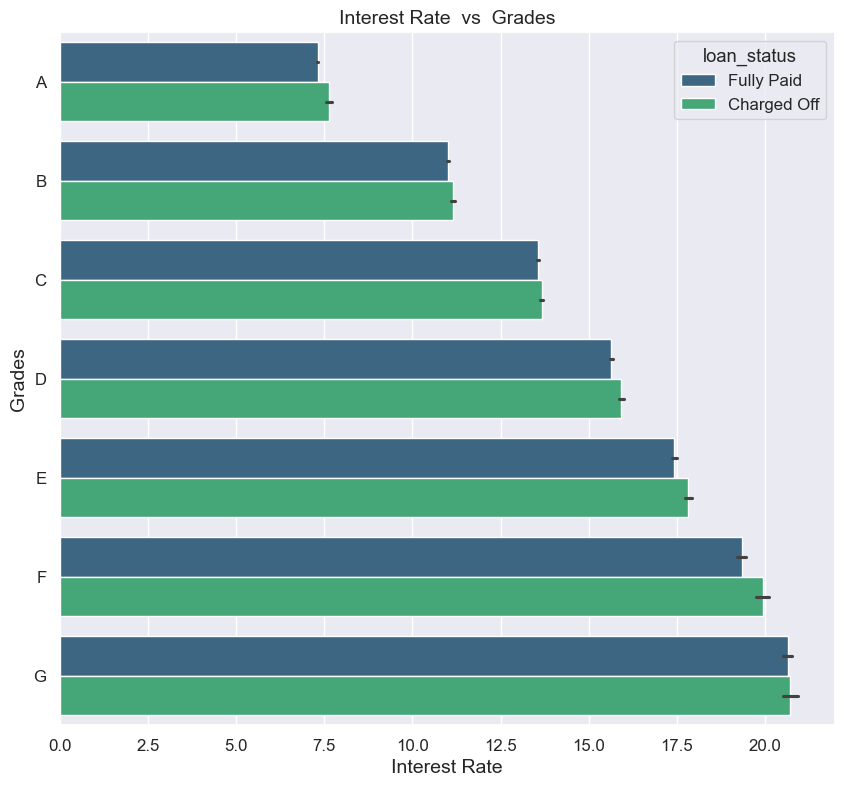

In [104]:
fig, ax1 = plt.subplots(figsize=(10, 9))
ax1.set_title('Interest Rate  vs  Grades',fontsize=14)
ax1 = sns.barplot(data =loan,x='int_rate', y='grade', hue ='loan_status',palette="viridis", order=['A','B','C','D','E','F','G'])
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Grades',fontsize=14)
plt.show()

<Figure size 640x480 with 0 Axes>

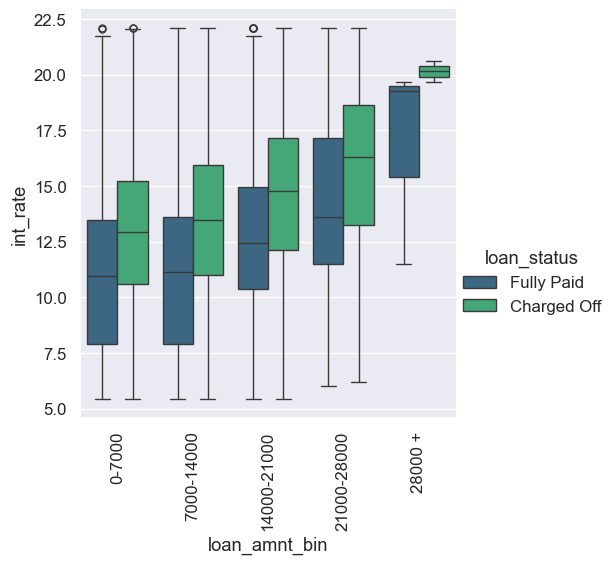

In [105]:
plt.tight_layout()
sns.catplot(data =loan,y ='int_rate', x ='loan_amnt_bin', hue ='loan_status',palette="viridis",kind = 'box')
plt.xticks(rotation=90)
plt.show()

# The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
# This can be a pretty strong driving factor for loan defaulting.

### 3.5 Multi-Variate Analysis

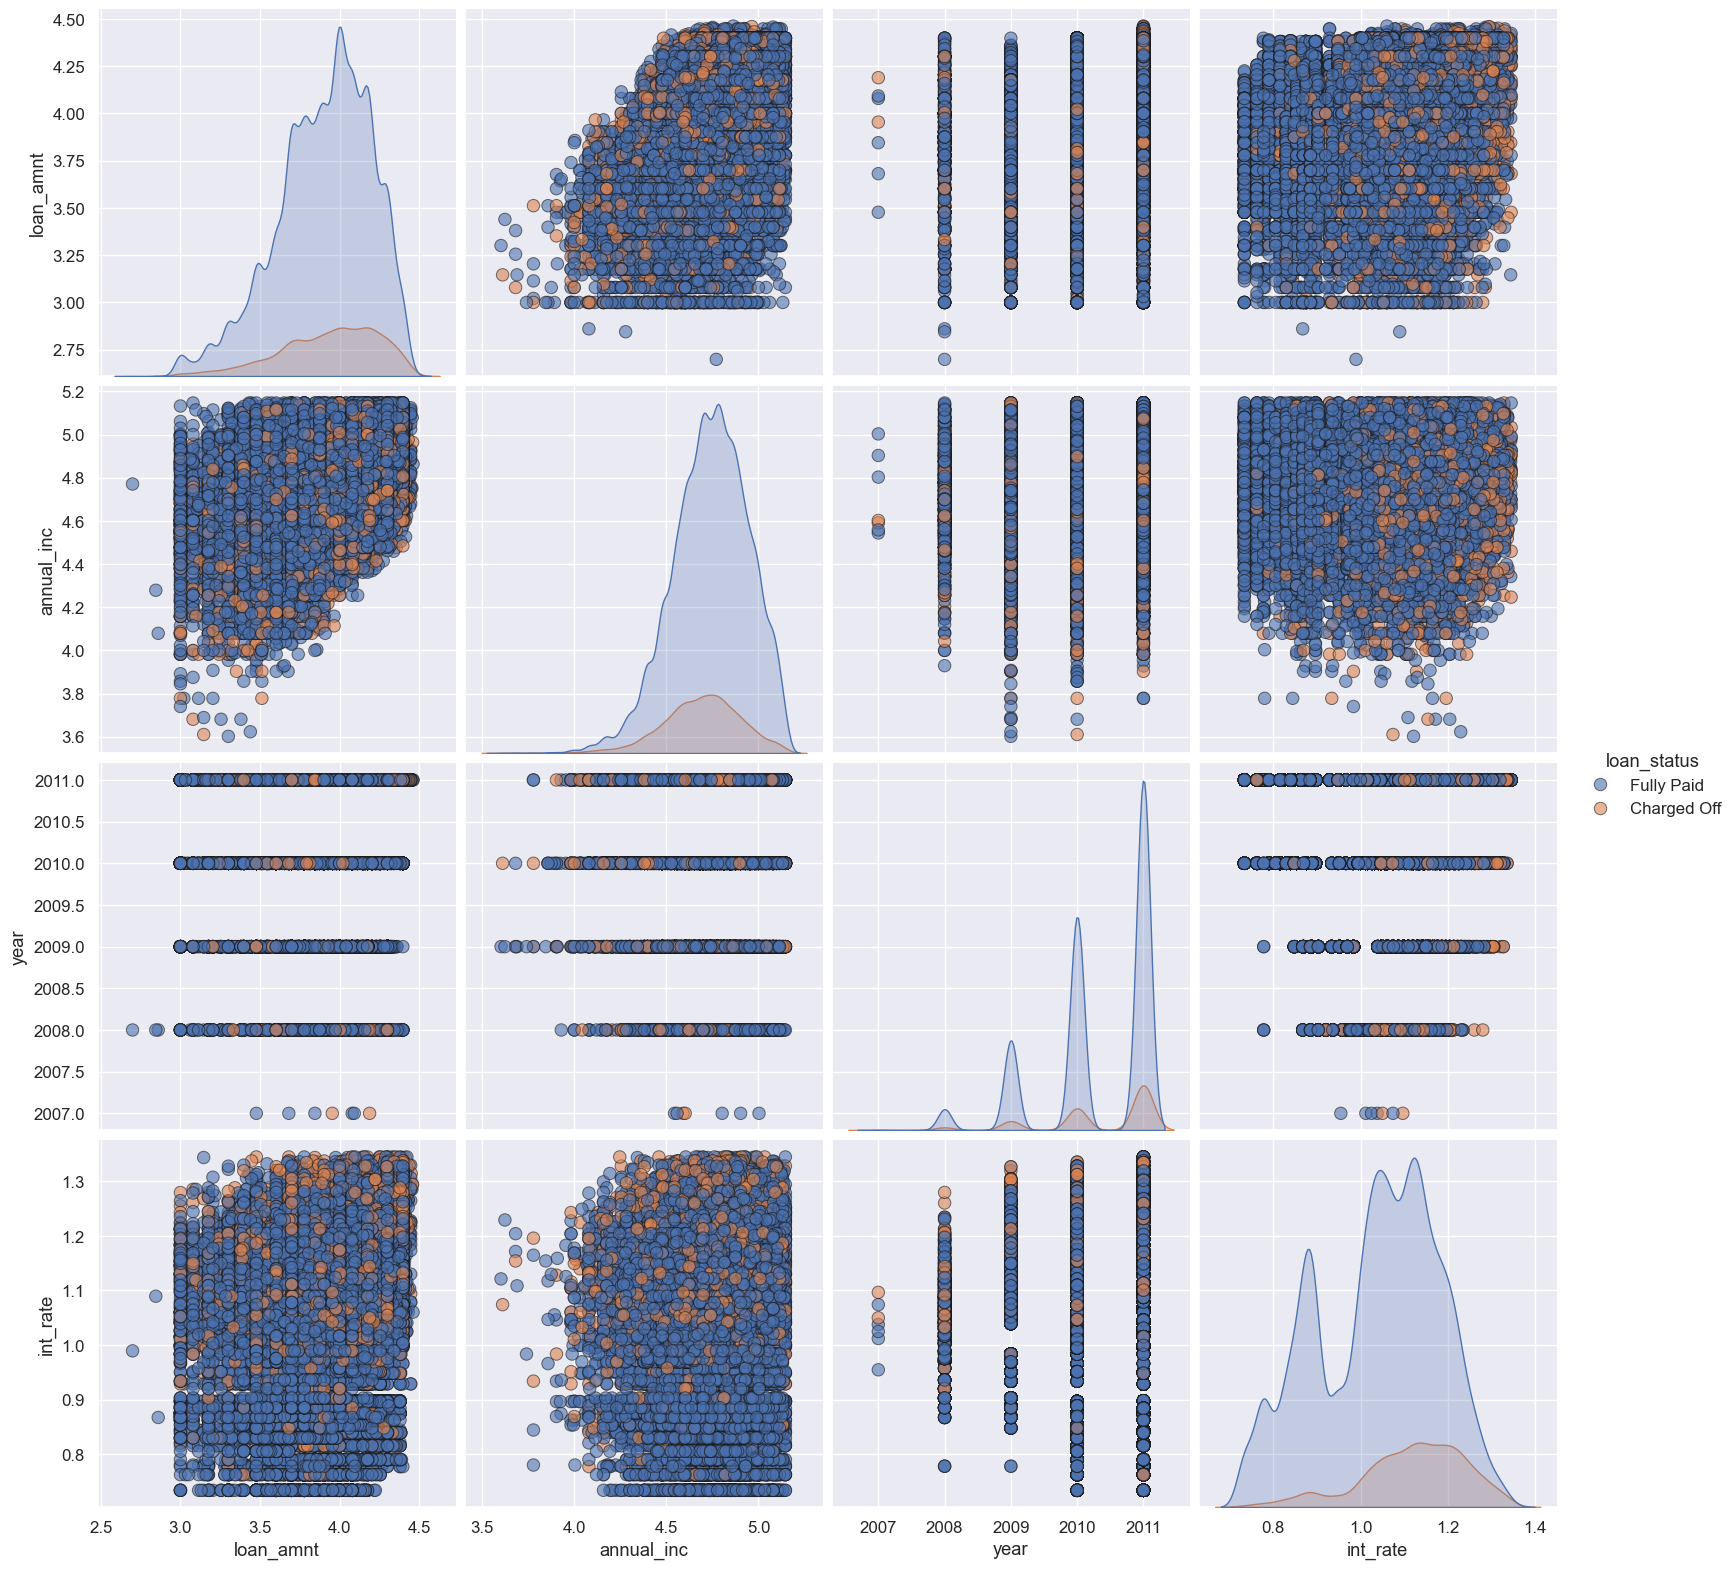

In [106]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

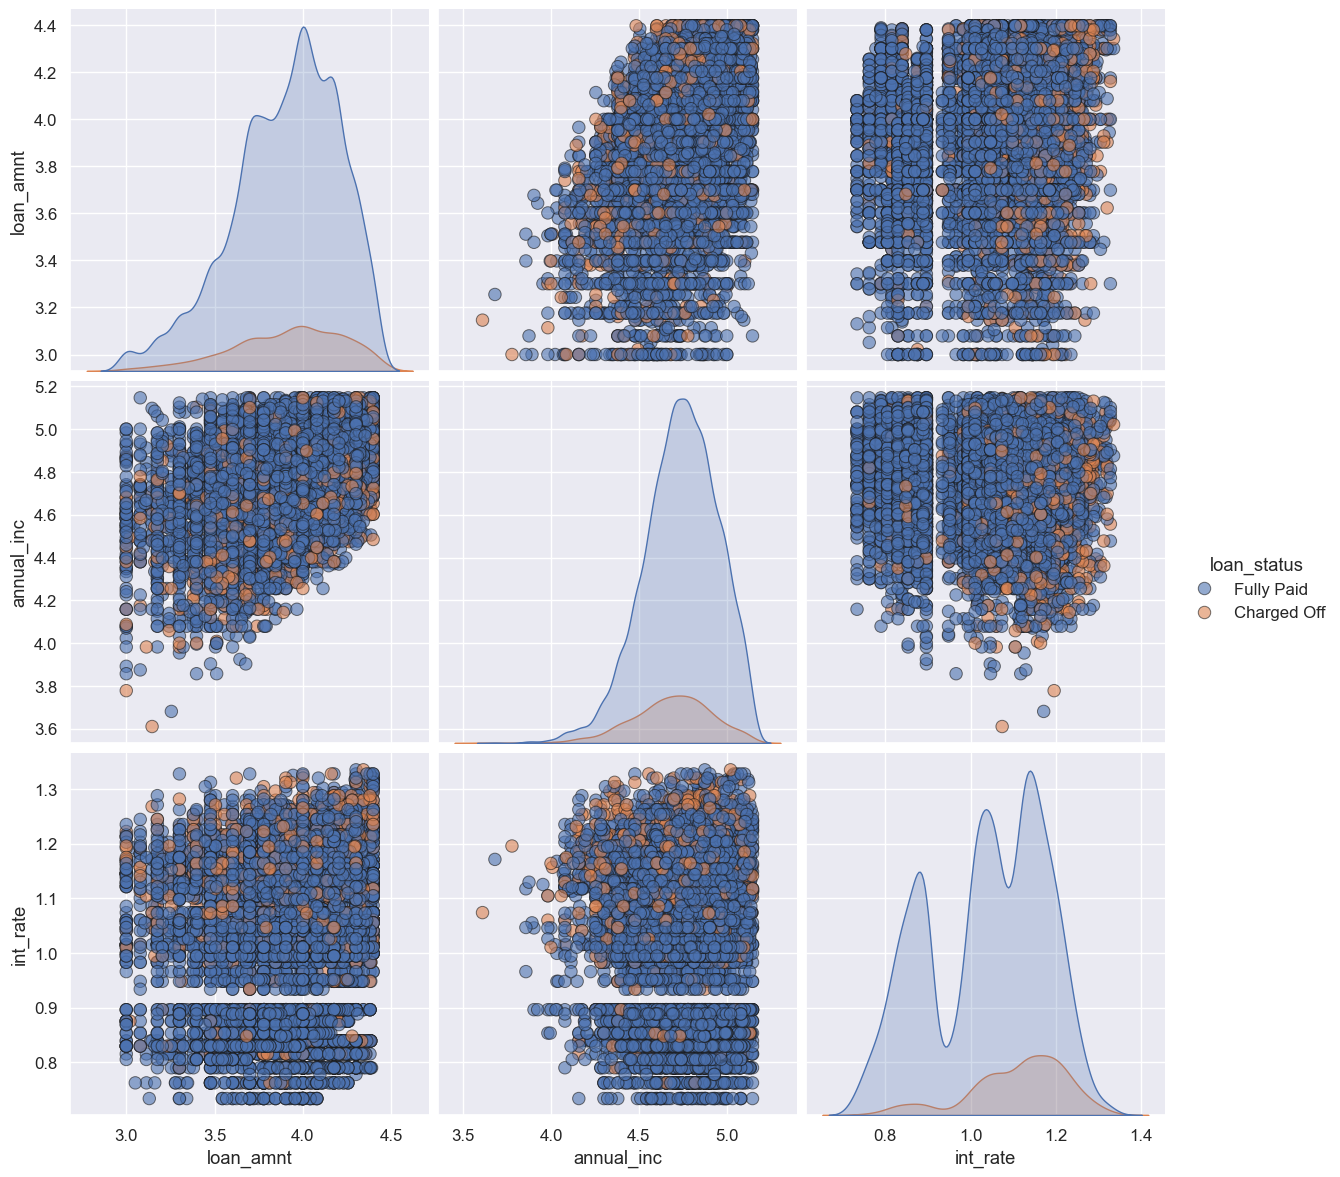

In [107]:
sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly
# Intrest rate is increasing with loan amount increase this results in high charged off.

## 4. Observations

### <u>Based on the EDA done on the given Data set, we can conclude the following:</u>

- The likelihood of being charged off rises as we progress from Grade “A” to “G”.
- The average interest rate for loans with a 60-month term is significantly higher than that for loans with a 36-month term.
- Charged off proportion increases as Interest Rate Increases.
- Individuals with negative public records are at a higher risk of being charged off than those without such records.
- Those applicants taking a loan to clear pre-existing Debt or are Small business owners, have a high probability of being defaulters.
- When the DTI is high(between 12+) the charged off risk increases.
- There is a significant rise in the Charged off count between the year 2010 and 2011. We also see that there is a consistent rise in the loan amount from the year 2008 onwards.
- Average interest rate is considerably higher for 60 months loan term than 36 months.
- Loan Defaulter are high when their Annual income ranges from 0 – 20k. As the annual income increases, the charged off proportion decreases.
- Loan applicants who have applied for a loan amount of more than 28k tend to have a high interest rate, which in turn can result in them becoming Charged off.
- Loans approved at certain months of the year seem to have a higher charged off rate than the rest of the months.
- Applicants who Rent a home or are paying Mortgage have a high probability of being loan defaulters.